In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"btrabucco","key": "2739d8f4e34124fc3a049d30ec2de40a"}') 
    # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73272 sha256=ea8eb908057a3f248417699ee521da3bb0b365e773ff925520b8be2d22f3e423
  Stored in directory: /root/.cache/pip/wheels/d4/02/ef/3f8c8d86b8d5388a1d3155876837f1a1a3143ab3fc2ff1ffad
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [ ]:
!kaggle competitions download -c kdd-cup-2014-predicting-excitement-at-donors-choose

100% 926M/926M [00:08<00:00, 161MB/s]
100% 926M/926M [00:08<00:00, 110MB/s]


In [ ]:
!mkdir '/content/data'

!unzip -qo 'kdd-cup-2014-predicting-excitement-at-donors-choose.zip' -d '/content/data'

In [ ]:
!unzip -qo 'data/*.zip' -d '/content/data'


6 archives were successfully processed.


In [ ]:
import pandas as pd
donations = pd.read_csv('data/donations.csv')
essays = pd.read_csv('data/essays.csv')
outcomes = pd.read_csv('data/outcomes.csv')
projects = pd.read_csv('data/projects.csv')
resources = pd.read_csv('data/resources.csv')

In [ ]:
projects.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')

In [ ]:
donations.head()

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,...,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,431d720bc3dfd75ae445a5eaa0b0638d,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269.0,f,2011-08-25 14:27:34.807,42.50,7.50,...,10_to_100,t,no_cash_received,f,t,f,f,f,f,I gave to this project because I support the e...
1,fcfedba1c8a0ba77d280cace80a909f6,ffffac55ee02a49d1abc87ba6fc61135,521f1830a77c9dbbf8119d99c6206a16,NaN,GA,NaN,f,2011-11-04 07:54:21.552,26.83,4.73,...,10_to_100,t,creditcard,f,t,f,f,f,f,I donated because I want to support kids in Ge...
2,3fa95d29986aa6f401c6719ced3a3ce7,ffffac55ee02a49d1abc87ba6fc61135,1e0a63fc8141c7ba26b8b44ca0871b90,Rockville,MD,20853.0,f,2011-11-02 22:53:53.019,55.35,0.00,...,10_to_100,f,no_cash_received,t,f,f,f,t,f,The Spark's 'pet' projects include those which...
3,020ad6bd5e88a35741d23b5e08f8b8e8,ffffac55ee02a49d1abc87ba6fc61135,1d4acb508df29d5f1cc6d382969576cb,Salem,IN,47167.0,f,2011-11-03 23:54:01.109,8.50,1.50,...,10_to_100,t,paypal,f,f,f,f,f,f,I gave to this project because Education is im...
4,4b44b03f304d6425ae94446686f93cd6,ffffac55ee02a49d1abc87ba6fc61135,59c3c3cfcccc53ae855f7eee911c478b,anonymous,NaN,0.0,f,2011-11-02 23:21:00.043,20.00,0.00,...,10_to_100,f,no_cash_received,f,f,t,f,t,f,I lent a paw to help the children in this clas...


In [ ]:
resources.head()

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430.0,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4.0
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82.0,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal fl...,BB11216668,148.00,1.0
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1.0
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Marker...,LA138,34.95,1.0
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4.0


In [ ]:
projects_donations = projects.merge(donations[["donationid", "projectid", "donation_timestamp", "donation_to_project"]], on="projectid")

In [ ]:
new_donations = donations.merge(projects[["date_posted", "projectid"]], on="projectid", how="left")

new_donations["donation_to_project"] = new_donations["donation_to_project"] * (
    (pd.to_datetime(new_donations["donation_timestamp"]) - 
     pd.to_datetime(new_donations["date_posted"])) < pd.Timedelta("120day")).astype(float)

joined = projects.join(new_donations.groupby("projectid")["donation_to_project"].sum(), on="projectid", how="left")

joined = joined.fillna(0)

joined["fraction_funded"] = joined["donation_to_project"] / joined["total_price_excluding_optional_support"]
joined["fully_funded"] = 0
joined.loc[joined["fraction_funded"] >= 1, "fully_funded"] = 1

joined["date_posted"] = pd.to_datetime(joined["date_posted"])

In [ ]:
codes, uniques = pd.factorize(joined["poverty_level"])
print(uniques)
joined["poverty_level_num"] = codes.astype(float)

Index(['highest poverty', 'high poverty', 'moderate poverty', 'low poverty'], dtype='object')


In [ ]:
import numpy as np

starting_date = pd.to_datetime("2008/01/01")

training_set_length = pd.Timedelta("360days")
validation_set_length = pd.Timedelta("120days")

model_retrain_interval = pd.Timedelta("360days")

records_df = []

for i in range(3):

    training_set_start = starting_date + model_retrain_interval * i
    training_set_end = training_set_start + training_set_length
    validation_set_end = training_set_end + validation_set_length

    training_set = joined[(joined['date_posted'] >= training_set_start) & 
                          (joined['date_posted'] < training_set_end)]

    validation_set = joined[(joined['date_posted'] >= training_set_end) & 
                            (joined['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", training_set_end,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    for baseline in ["total_price_excluding_optional_support", "students_reached", "total_price_including_optional_support"]:

        for percentile in np.linspace(0, 1, num=51):

            split_value = training_set[baseline].quantile(q=1 - percentile)

            split_failure_rate_val = validation_set[validation_set[baseline] > split_value]["fully_funded"].mean()

            precision_val = 1 - split_failure_rate_val

            subsampled_val = validation_set[validation_set["fully_funded"] != 1]

            subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)

            recall_val = subsampled_val["true_positive"].mean()

            print(i, percentile, baseline, 1 - validation_set["fully_funded"].mean(), precision_val, recall_val)

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=recall_val, type="recall")
            )

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=precision_val, type="precision")
            )

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00
0 0.0 total_price_excluding_optional_support 0.4430856612959314 1.0 0.00013080444735120994
0 0.02 total_price_excluding_optional_support 0.4430856612959314 0.5336538461538461 0.02903858731196861
0 0.04 total_price_excluding_optional_support 0.4430856612959314 0.5402144772117963 0.052714192282537604
0 0.06 total_price_excluding_optional_support 0.4430856612959314 0.5161904761904762 0.07089601046435579
0 0.08 total_price_excluding_optional_support 0.4430856612959314 0.5286123032904149 0.09666448659254415
0 0.1 total_price_excluding_optional_support 0.4430856612959314 0.5552645364064955 0.13865271419228253
0 0.12 total_price_excluding_optional_support 0.4430856612959

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.32 total_price_excluding_optional_support 0.4430856612959314 0.5319381255686988 0.3823413996075867
0 0.34 total_price_excluding_optional_support 0.4430856612959314 0.5290488431876607 0.4037933289731851
0 0.36 total_price_excluding_optional_support 0.4430856612959314 0.5270682730923695 0.42916939175931984
0 0.38 total_price_excluding_optional_support 0.4430856612959314 0.5267221801665405 0.45506867233485937
0 0.4 total_price_excluding_optional_support 0.4430856612959314 0.5272675086107922 0.4805755395683453
0 0.42 total_price_excluding_optional_support 0.4430856612959314 0.5278004905968929 0.5066056245912361
0 0.44 total_price_excluding_optional_support 0.4430856612959314 0.5290339157245632 0.5386527141922826
0 0.46 total_price_excluding_optional_support 0.4430856612959314 0.5295708840526251 0.5633747547416612
0 0.48 total_price_excluding_optional_support 0.4430856612959314 0.529460482725982 0.5853499018966645
0 0.5 total_price_excluding_optional_support 0.4430856612959314 0.5287264

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.6 total_price_excluding_optional_support 0.4430856612959314 0.5179669485011529 0.7051667756703728
0 0.62 total_price_excluding_optional_support 0.4430856612959314 0.5154283583480936 0.7232177894048397
0 0.64 total_price_excluding_optional_support 0.4430856612959314 0.5134085778781039 0.7437540876389798
0 0.66 total_price_excluding_optional_support 0.4430856612959314 0.5127032967032967 0.7628515369522564
0 0.68 total_price_excluding_optional_support 0.4430856612959314 0.5113160816465967 0.7831262262916939
0 0.7000000000000001 total_price_excluding_optional_support 0.4430856612959314 0.5102739726027397 0.7990843688685415
0 0.72 total_price_excluding_optional_support 0.4430856612959314 0.5069191551347414 0.819359058207979
0 0.74 total_price_excluding_optional_support 0.4430856612959314 0.5038228107511626 0.8361020274689339
0 0.76 total_price_excluding_optional_support 0.4430856612959314 0.501912192137066 0.8583387835186397
0 0.78 total_price_excluding_optional_support 0.44308566129593

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.88 total_price_excluding_optional_support 0.4430856612959314 0.48174797016304705 0.9546108567691302
0 0.9 total_price_excluding_optional_support 0.4430856612959314 0.47627654767284233 0.965075212557227
0 0.92 total_price_excluding_optional_support 0.4430856612959314 0.47008708822415757 0.9743623283191628
0 0.9400000000000001 total_price_excluding_optional_support 0.4430856612959314 0.46325208269052764 0.9819489862655331
0 0.96 total_price_excluding_optional_support 0.4430856612959314 0.45647442872687705 0.9877043819489862
0 0.98 total_price_excluding_optional_support 0.4430856612959314 0.4504909499585946 0.9962066710268149
0 1.0 total_price_excluding_optional_support 0.4430856612959314 0.4430210990030141 0.9997383911052976
0 0.0 students_reached 0.4430856612959314 nan 0.0
0 0.02 students_reached 0.4430856612959314 0.47965116279069764 0.02158273381294964
0 0.04 students_reached 0.4430856612959314 0.4847457627118644 0.03741007194244604
0 0.06 students_reached 0.4430856612959314 0.498

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.18 students_reached 0.4430856612959314 0.4210059171597633 0.18613472858077174
0 0.2 students_reached 0.4430856612959314 0.422797324803722 0.19018966644865926
0 0.22 students_reached 0.4430856612959314 0.4177029992684711 0.22406801831262263
0 0.24 students_reached 0.4430856612959314 0.4113601065009984 0.24251144538914324
0 0.26 students_reached 0.4430856612959314 0.4093163683416001 0.24826684107259647
0 0.28 students_reached 0.4430856612959314 0.4011805026656512 0.27560497056899935
0 0.3 students_reached 0.4430856612959314 0.4044143823424706 0.29718770438194897
0 0.32 students_reached 0.4430856612959314 0.4044143823424706 0.29718770438194897
0 0.34 students_reached 0.4430856612959314 0.40269297009550653 0.336429038587312
0 0.36 students_reached 0.4430856612959314 0.40303172370682916 0.3373446697187704
0 0.38 students_reached 0.4430856612959314 0.406522672006866 0.37174623937213863
0 0.4 students_reached 0.4430856612959314 0.4103123721184013 0.3934597776324395
0 0.42 students_reached

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.5 students_reached 0.4430856612959314 0.41175770558133995 0.4525833878351864
0 0.52 students_reached 0.4430856612959314 0.41300129366106075 0.5011118378024852
0 0.54 students_reached 0.4430856612959314 0.4147295012679628 0.513407455853499
0 0.56 students_reached 0.4430856612959314 0.4180981595092025 0.5348593852190975
0 0.58 students_reached 0.4430856612959314 0.4180981595092025 0.5348593852190975
0 0.6 students_reached 0.4430856612959314 0.4180981595092025 0.5348593852190975
0 0.62 students_reached 0.4430856612959314 0.4180981595092025 0.5348593852190975
0 0.64 students_reached 0.4430856612959314 0.4222490257932826 0.5952910398953565
0 0.66 students_reached 0.4430856612959314 0.4249844181283946 0.6243296272073251
0 0.68 students_reached 0.4430856612959314 0.42750929368029744 0.6468279921517331
0 0.7000000000000001 students_reached 0.4430856612959314 0.42750929368029744 0.6468279921517331
0 0.72 students_reached 0.4430856612959314 0.4302739385914094 0.6800523217789405
0 0.74 studen

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.78 students_reached 0.4430856612959314 0.43434101087651955 0.7103989535644212
0 0.8 students_reached 0.4430856612959314 0.43434101087651955 0.7103989535644212
0 0.8200000000000001 students_reached 0.4430856612959314 0.43434101087651955 0.7103989535644212
0 0.84 students_reached 0.4430856612959314 0.43434101087651955 0.7103989535644212
0 0.86 students_reached 0.4430856612959314 0.4422117421912378 0.8463047743623283
0 0.88 students_reached 0.4430856612959314 0.4422117421912378 0.8463047743623283
0 0.9 students_reached 0.4430856612959314 0.4441492808086044 0.8966644865925442
0 0.92 students_reached 0.4430856612959314 0.4449980835569184 0.9111837802485284
0 0.9400000000000001 students_reached 0.4430856612959314 0.4448499845344881 0.9406147809025507
0 0.96 students_reached 0.4430856612959314 0.4438324658031715 0.9591890124264225
0 0.98 students_reached 0.4430856612959314 0.4432162595828133 0.9755395683453237
0 1.0 students_reached 0.4430856612959314 0.4433737737272886 0.9990843688685416

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.04 total_price_including_optional_support 0.4430856612959314 0.5402144772117963 0.052714192282537604
0 0.06 total_price_including_optional_support 0.4430856612959314 0.5161904761904762 0.07089601046435579
0 0.08 total_price_including_optional_support 0.4430856612959314 0.5286123032904149 0.09666448659254415
0 0.1 total_price_including_optional_support 0.4430856612959314 0.5552645364064955 0.13865271419228253
0 0.12 total_price_including_optional_support 0.4430856612959314 0.5562155282138311 0.17148463047743623
0 0.14 total_price_including_optional_support 0.4430856612959314 0.5586549484142147 0.19123610202746893
0 0.16 total_price_including_optional_support 0.4430856612959314 0.5499492041991195 0.21242642249836494
0 0.18 total_price_including_optional_support 0.4430856612959314 0.5469828880216152 0.23832570307390452
0 0.2 total_price_including_optional_support 0.4430856612959314 0.5452024403771492 0.2571615434924787
0 0.22 total_price_including_optional_support 0.4430856612959314 0

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.36 total_price_including_optional_support 0.4430856612959314 0.5270682730923695 0.42916939175931984
0 0.38 total_price_including_optional_support 0.4430856612959314 0.5267221801665405 0.45506867233485937
0 0.4 total_price_including_optional_support 0.4430856612959314 0.5272675086107922 0.4805755395683453
0 0.42 total_price_including_optional_support 0.4430856612959314 0.5278004905968929 0.5066056245912361
0 0.44 total_price_including_optional_support 0.4430856612959314 0.5290339157245632 0.5386527141922826
0 0.46 total_price_including_optional_support 0.4430856612959314 0.5295708840526251 0.5633747547416612
0 0.48 total_price_including_optional_support 0.4430856612959314 0.529460482725982 0.5853499018966645
0 0.5 total_price_including_optional_support 0.4430856612959314 0.5287264420331239 0.6054937867887508
0 0.52 total_price_including_optional_support 0.4430856612959314 0.5293020193151887 0.6308698495748856
0 0.54 total_price_including_optional_support 0.4430856612959314 0.5260294

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.64 total_price_including_optional_support 0.4430856612959314 0.5134085778781039 0.7437540876389798
0 0.66 total_price_including_optional_support 0.4430856612959314 0.5127032967032967 0.7628515369522564
0 0.68 total_price_including_optional_support 0.4430856612959314 0.5113160816465967 0.7831262262916939
0 0.7000000000000001 total_price_including_optional_support 0.4430856612959314 0.5102739726027397 0.7990843688685415
0 0.72 total_price_including_optional_support 0.4430856612959314 0.5069191551347414 0.819359058207979
0 0.74 total_price_including_optional_support 0.4430856612959314 0.5038228107511626 0.8361020274689339
0 0.76 total_price_including_optional_support 0.4430856612959314 0.501912192137066 0.8583387835186397
0 0.78 total_price_including_optional_support 0.4430856612959314 0.5002982403817477 0.8776978417266187
0 0.8 total_price_including_optional_support 0.4430856612959314 0.49680464778503997 0.8948332243296272
0 0.8200000000000001 total_price_including_optional_support 0

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 0.9 total_price_including_optional_support 0.4430856612959314 0.47627654767284233 0.965075212557227
0 0.92 total_price_including_optional_support 0.4430856612959314 0.47008708822415757 0.9743623283191628
0 0.9400000000000001 total_price_including_optional_support 0.4430856612959314 0.46325208269052764 0.9819489862655331
0 0.96 total_price_including_optional_support 0.4430856612959314 0.45647442872687705 0.9877043819489862
0 0.98 total_price_including_optional_support 0.4430856612959314 0.4504909499585946 0.9962066710268149
0 1.0 total_price_including_optional_support 0.4430856612959314 0.4430210990030141 0.9997383911052976
training_set_start: 2008-12-26 00:00:00 training_set_end: 2009-12-21 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-04-20 00:00:00
validation_set_start: 2009-12-21 00:00:00 validation_set_end: 2010-04-20 00:00:00 start_date_for_labels: 2010-04-20 00:00:00 end_date_for_labels: 2010-08-18 00:00:00
1 0.0 total_price_excluding_optional_su

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.12 total_price_excluding_optional_support 0.40850670365233477 0.5662295081967212 0.19545043005885016
1 0.14 total_price_excluding_optional_support 0.40850670365233477 0.5619259671583634 0.22849705749207785
1 0.16 total_price_excluding_optional_support 0.40850670365233477 0.5503121098626717 0.2494341330918968
1 0.18 total_price_excluding_optional_support 0.40850670365233477 0.5395348837209302 0.2756903576278859
1 0.2 total_price_excluding_optional_support 0.40850670365233477 0.5328705594120049 0.29538252602987775
1 0.22 total_price_excluding_optional_support 0.40850670365233477 0.5289663006436955 0.31620642824807604
1 0.24 total_price_excluding_optional_support 0.40850670365233477 0.5257731958762887 0.3347668628338615
1 0.26 total_price_excluding_optional_support 0.40850670365233477 0.5246852220013254 0.3584200995925758
1 0.28 total_price_excluding_optional_support 0.40850670365233477 0.5206494325346784 0.3738116794929833
1 0.3 total_price_excluding_optional_support 0.40850670365233

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.4 total_price_excluding_optional_support 0.40850670365233477 0.5012483652360005 0.47713897691263013
1 0.42 total_price_excluding_optional_support 0.40850670365233477 0.4980881691408007 0.5012449071978271
1 0.44 total_price_excluding_optional_support 0.40850670365233477 0.49286778794975517 0.5239927569035763
1 0.46 total_price_excluding_optional_support 0.40850670365233477 0.49029820261437906 0.5433454051607062
1 0.48 total_price_excluding_optional_support 0.40850670365233477 0.48810904872389793 0.5714124038026256
1 0.5 total_price_excluding_optional_support 0.40850670365233477 0.4872727272727273 0.5914440923494794
1 0.52 total_price_excluding_optional_support 0.40850670365233477 0.48607617678763926 0.6123811679492983
1 0.54 total_price_excluding_optional_support 0.40850670365233477 0.4847647820457488 0.6355817111815301
1 0.56 total_price_excluding_optional_support 0.40850670365233477 0.4828938584779706 0.6549343594386601
1 0.58 total_price_excluding_optional_support 0.4085067036523

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.66 total_price_excluding_optional_support 0.40850670365233477 0.46717685880783544 0.7530556813037573
1 0.68 total_price_excluding_optional_support 0.40850670365233477 0.4643903768827098 0.7711634223630602
1 0.7000000000000001 total_price_excluding_optional_support 0.40850670365233477 0.46276172806785054 0.7904028972385695
1 0.72 total_price_excluding_optional_support 0.40850670365233477 0.4588515821357221 0.8057944771389769
1 0.74 total_price_excluding_optional_support 0.40850670365233477 0.4561193653991438 0.8199411498415573
1 0.76 total_price_excluding_optional_support 0.40850670365233477 0.4545174980011071 0.8363512901765505
1 0.78 total_price_excluding_optional_support 0.40850670365233477 0.4521604016016255 0.8562698053417837
1 0.8 total_price_excluding_optional_support 0.40850670365233477 0.44920191075381566 0.8726799456767769
1 0.8200000000000001 total_price_excluding_optional_support 0.40850670365233477 0.4466765308445254 0.8882978723404256
1 0.84 total_price_excluding_optio

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.88 total_price_excluding_optional_support 0.40850670365233477 0.43875705012237953 0.9332277048438208
1 0.9 total_price_excluding_optional_support 0.40850670365233477 0.43466984802116293 0.9483929379809869
1 0.92 total_price_excluding_optional_support 0.40850670365233477 0.43104586783156396 0.960389316432775
1 0.9400000000000001 total_price_excluding_optional_support 0.40850670365233477 0.42697355339033605 0.9720461747397012
1 0.96 total_price_excluding_optional_support 0.40850670365233477 0.42068998981027705 0.9812132186509733
1 0.98 total_price_excluding_optional_support 0.40850670365233477 0.4139982998016435 0.992077863286555
1 1.0 total_price_excluding_optional_support 0.40850670365233477 0.40850670365233477 1.0
1 0.0 students_reached 0.40850670365233477 nan 0.0
1 0.02 students_reached 0.40850670365233477 0.47316103379721675 0.02693526482571299
1 0.04 students_reached 0.40850670365233477 0.44932432432432434 0.04515617926663649
1 0.06 students_reached 0.40850670365233477 0.438667

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.16 students_reached 0.40850670365233477 0.418848167539267 0.16296966953372566
1 0.18 students_reached 0.40850670365233477 0.41957855428114166 0.17802172928927115
1 0.2 students_reached 0.40850670365233477 0.41367076631977295 0.1979402444545043
1 0.22 students_reached 0.40850670365233477 0.4119586722356562 0.21208691715708466
1 0.24 students_reached 0.40850670365233477 0.4119586722356562 0.21208691715708466
1 0.26 students_reached 0.40850670365233477 0.4142831116779012 0.25735626980534176
1 0.28 students_reached 0.40850670365233477 0.41070817653096137 0.2717292892711634
1 0.3 students_reached 0.40850670365233477 0.410410094637224 0.29447713897691263
1 0.32 students_reached 0.40850670365233477 0.4104577099688935 0.31360344047080124
1 0.34 students_reached 0.40850670365233477 0.4073359073359073 0.3343141693073789
1 0.36 students_reached 0.40850670365233477 0.4073359073359073 0.3343141693073789
1 0.38 students_reached 0.40850670365233477 0.40618403079597665 0.37019013128112266
1 0.4 st

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.46 students_reached 0.40850670365233477 0.40894844915162654 0.42824807605251247
1 0.48 students_reached 0.40850670365233477 0.40632822669470314 0.45925758261656857
1 0.5 students_reached 0.40850670365233477 0.4046476620566375 0.4867587143503848
1 0.52 students_reached 0.40850670365233477 0.40421563141204997 0.490493435943866
1 0.54 students_reached 0.40850670365233477 0.40421563141204997 0.490493435943866
1 0.56 students_reached 0.40850670365233477 0.4008093752634685 0.538026256224536
1 0.58 students_reached 0.40850670365233477 0.4010642652476464 0.5544363965595291
1 0.6 students_reached 0.40850670365233477 0.40031372549019606 0.577636939791761
1 0.62 students_reached 0.40850670365233477 0.40031372549019606 0.577636939791761
1 0.64 students_reached 0.40850670365233477 0.40031372549019606 0.577636939791761
1 0.66 students_reached 0.40850670365233477 0.40031372549019606 0.577636939791761
1 0.68 students_reached 0.40850670365233477 0.40189175734300553 0.6395427795382526


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.7000000000000001 students_reached 0.40850670365233477 0.40226050248519096 0.6686283386147578
1 0.72 students_reached 0.40850670365233477 0.4027887398053144 0.6930737890448166
1 0.74 students_reached 0.40850670365233477 0.4027887398053144 0.6930737890448166
1 0.76 students_reached 0.40850670365233477 0.4042287001125985 0.731326392032594
1 0.78 students_reached 0.40850670365233477 0.4053220441487754 0.7584880036215482
1 0.8 students_reached 0.40850670365233477 0.4053220441487754 0.7584880036215482
1 0.8200000000000001 students_reached 0.40850670365233477 0.4053220441487754 0.7584880036215482
1 0.84 students_reached 0.40850670365233477 0.4053220441487754 0.7584880036215482
1 0.86 students_reached 0.40850670365233477 0.40698053713167337 0.8472159348121322
1 0.88 students_reached 0.40850670365233477 0.40743116813686175 0.862494341330919
1 0.9 students_reached 0.40850670365233477 0.4095277676762429 0.8921457673155274
1 0.92 students_reached 0.40850670365233477 0.40944683000757764 0.91727

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.9400000000000001 students_reached 0.40850670365233477 0.4089646965489885 0.9334540516070621
1 0.96 students_reached 0.40850670365233477 0.409227343144849 0.9566545948392938
1 0.98 students_reached 0.40850670365233477 0.40944320289097047 0.9745359891353553
1 1.0 students_reached 0.40850670365233477 0.4083939407977023 0.9977365323675872
1 0.0 total_price_including_optional_support 0.40850670365233477 nan 0.0
1 0.02 total_price_including_optional_support 0.40850670365233477 0.6709558823529411 0.04130828429153463
1 0.04 total_price_including_optional_support 0.40850670365233477 0.5875486381322957 0.06835672249886826
1 0.06 total_price_including_optional_support 0.40850670365233477 0.5427350427350428 0.08623811679492983
1 0.08 total_price_including_optional_support 0.40850670365233477 0.5363636363636364 0.11351290176550476
1 0.1 total_price_including_optional_support 0.40850670365233477 0.5459140690817186 0.14667270258035311
1 0.12 total_price_including_optional_support 0.40850670365233

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.2 total_price_including_optional_support 0.40850670365233477 0.5264029819838476 0.28768673607967404
1 0.22 total_price_including_optional_support 0.40850670365233477 0.5219062259800153 0.30737890448166594
1 0.24 total_price_including_optional_support 0.40850670365233477 0.5203164329377922 0.32752376641014036
1 0.26 total_price_including_optional_support 0.40850670365233477 0.518462571332662 0.3495925758261657
1 0.28 total_price_including_optional_support 0.40850670365233477 0.5139888089528377 0.3638524219103667
1 0.3 total_price_including_optional_support 0.40850670365233477 0.5089421036677781 0.38003621548211863
1 0.32 total_price_including_optional_support 0.40850670365233477 0.5066336200612334 0.3932775011317338
1 0.34 total_price_including_optional_support 0.40850670365233477 0.5010505673063455 0.4048211860570394
1 0.36 total_price_including_optional_support 0.40850670365233477 0.4978407557354926 0.4174966047985514
1 0.38 total_price_including_optional_support 0.408506703652334

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.48 total_price_including_optional_support 0.40850670365233477 0.4806786975284425 0.5546627433227704
1 0.5 total_price_including_optional_support 0.40850670365233477 0.47995082277283907 0.5743549117247624
1 0.52 total_price_including_optional_support 0.40850670365233477 0.48099083567734324 0.5999320959710276
1 0.54 total_price_including_optional_support 0.40850670365233477 0.4796407707733892 0.6225667722951562
1 0.56 total_price_including_optional_support 0.40850670365233477 0.47788356222091166 0.6419194205522861
1 0.58 total_price_including_optional_support 0.40850670365233477 0.4756127351192899 0.6610457220461747
1 0.6 total_price_including_optional_support 0.40850670365233477 0.4736718198226477 0.6831145314622001
1 0.62 total_price_including_optional_support 0.40850670365233477 0.47075272067714635 0.7049569941149841
1 0.64 total_price_including_optional_support 0.40850670365233477 0.4670947030497592 0.7245359891353553
1 0.66 total_price_including_optional_support 0.40850670365233

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.74 total_price_including_optional_support 0.40850670365233477 0.45418930873246555 0.8134902670891806
1 0.76 total_price_including_optional_support 0.40850670365233477 0.45209118428368444 0.8282028066998642
1 0.78 total_price_including_optional_support 0.40850670365233477 0.45035375944357836 0.8500452693526482
1 0.8 total_price_including_optional_support 0.40850670365233477 0.4476251679616755 0.8671344499773653
1 0.8200000000000001 total_price_including_optional_support 0.40850670365233477 0.4451925820256776 0.8829787234042553
1 0.84 total_price_including_optional_support 0.40850670365233477 0.4435641354683926 0.8997283838841105
1 0.86 total_price_including_optional_support 0.40850670365233477 0.44151951166339654 0.9168175645088276
1 0.88 total_price_including_optional_support 0.40850670365233477 0.43808610400682013 0.9305115436849253
1 0.9 total_price_including_optional_support 0.40850670365233477 0.43387892959210184 0.9449977365323676
1 0.92 total_price_including_optional_support 

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 0.98 total_price_including_optional_support 0.40850670365233477 0.41397062296320786 0.9919646899049344
1 1.0 total_price_including_optional_support 0.40850670365233477 0.40850670365233477 1.0
training_set_start: 2009-12-21 00:00:00 training_set_end: 2010-12-16 00:00:00 start_date_for_labels: 2010-04-20 00:00:00 end_date_for_labels: 2011-04-15 00:00:00
validation_set_start: 2010-12-16 00:00:00 validation_set_end: 2011-04-15 00:00:00 start_date_for_labels: 2011-04-15 00:00:00 end_date_for_labels: 2011-08-13 00:00:00
2 0.0 total_price_excluding_optional_support 0.4461222875784687 nan 0.0
2 0.02 total_price_excluding_optional_support 0.4461222875784687 0.7513513513513513 0.02310121322918398
2 0.04 total_price_excluding_optional_support 0.4461222875784687 0.663109756097561 0.04819677580189463
2 0.06 total_price_excluding_optional_support 0.4461222875784687 0.6391554702495201 0.07379092571048695
2 0.08 total_price_excluding_optional_support 0.4461222875784687 0.6302083333333333 0.100548446

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.14 total_price_excluding_optional_support 0.4461222875784687 0.5944753500863227 0.17168023932192122
2 0.16 total_price_excluding_optional_support 0.4461222875784687 0.5931723563696919 0.19732978782338928
2 0.18 total_price_excluding_optional_support 0.4461222875784687 0.5811693021906281 0.22192676306021827
2 0.2 total_price_excluding_optional_support 0.4461222875784687 0.5784339229968782 0.24635754251842004
2 0.22 total_price_excluding_optional_support 0.4461222875784687 0.5709407747556812 0.26862777685446787
2 0.24 total_price_excluding_optional_support 0.4461222875784687 0.5676225123047294 0.2938895352058058
2 0.26 total_price_excluding_optional_support 0.4461222875784687 0.5626651012621074 0.31859730762838623
2 0.28 total_price_excluding_optional_support 0.4461222875784687 0.559661139149243 0.34402526175835135
2 0.3 total_price_excluding_optional_support 0.4461222875784687 0.5559780312632023 0.3645227411223755
2 0.32 total_price_excluding_optional_support 0.4461222875784687 0.54

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.36 total_price_excluding_optional_support 0.4461222875784687 0.5418446669934869 0.42861891307960776
2 0.38 total_price_excluding_optional_support 0.4461222875784687 0.5379078061022322 0.45122153897291006
2 0.4 total_price_excluding_optional_support 0.4461222875784687 0.5332918868511035 0.4752091296881059
2 0.42 total_price_excluding_optional_support 0.4461222875784687 0.5279429951121842 0.49664838513101767
2 0.44 total_price_excluding_optional_support 0.4461222875784687 0.5254963898916967 0.5160932912304027
2 0.46 total_price_excluding_optional_support 0.4461222875784687 0.522260644045818 0.5354827987369121
2 0.48 total_price_excluding_optional_support 0.4461222875784687 0.5202653674717529 0.5560910752866877
2 0.5 total_price_excluding_optional_support 0.4461222875784687 0.5171435680517542 0.5757021771647001
2 0.52 total_price_excluding_optional_support 0.4461222875784687 0.515121112225885 0.597307628386239


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.54 total_price_excluding_optional_support 0.4461222875784687 0.5139226570026147 0.6206304359869259
2 0.56 total_price_excluding_optional_support 0.4461222875784687 0.511841405002661 0.6393551603789264
2 0.58 total_price_excluding_optional_support 0.4461222875784687 0.5122762148337596 0.6657802891806548
2 0.6 total_price_excluding_optional_support 0.4461222875784687 0.5103150554148852 0.6810703008143593
2 0.62 total_price_excluding_optional_support 0.4461222875784687 0.5050373355458101 0.7081602127305966
2 0.64 total_price_excluding_optional_support 0.4461222875784687 0.5014036418816388 0.7322032020386682
2 0.66 total_price_excluding_optional_support 0.4461222875784687 0.4977854240638383 0.7533654645172012
2 0.68 total_price_excluding_optional_support 0.4461222875784687 0.49407436233063284 0.7736967481025981
2 0.7000000000000001 total_price_excluding_optional_support 0.4461222875784687 0.49102515701685145 0.7925876682732259


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.72 total_price_excluding_optional_support 0.4461222875784687 0.48850248639989324 0.8108692039222204
2 0.74 total_price_excluding_optional_support 0.4461222875784687 0.4856827836689691 0.8297047254999723
2 0.76 total_price_excluding_optional_support 0.4461222875784687 0.4824869482676791 0.8447731427621739
2 0.78 total_price_excluding_optional_support 0.4461222875784687 0.4795127353266888 0.86355326574705
2 0.8 total_price_excluding_optional_support 0.4461222875784687 0.47682736234671796 0.8788986759736303
2 0.8200000000000001 total_price_excluding_optional_support 0.4461222875784687 0.47424255781833147 0.8940224918287075
2 0.84 total_price_excluding_optional_support 0.4461222875784687 0.4716563075506446 0.90803833582627


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.86 total_price_excluding_optional_support 0.4461222875784687 0.4686499241530423 0.9242147249459863
2 0.88 total_price_excluding_optional_support 0.4461222875784687 0.4654100112331845 0.9410558971802117
2 0.9 total_price_excluding_optional_support 0.4461222875784687 0.46196948979865415 0.9545731538418925
2 0.92 total_price_excluding_optional_support 0.4461222875784687 0.4580370963087337 0.9672040330175613
2 0.9400000000000001 total_price_excluding_optional_support 0.4461222875784687 0.4538899722877964 0.9799457093789817
2 0.96 total_price_excluding_optional_support 0.4461222875784687 0.4494367928551717 0.9924657913688992


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.98 total_price_excluding_optional_support 0.4461222875784687 0.44614167778931235 0.9999446014071243
2 1.0 total_price_excluding_optional_support 0.4461222875784687 0.4461222875784687 1.0
2 0.0 students_reached 0.4461222875784687 nan 0.0
2 0.02 students_reached 0.4461222875784687 0.5011337868480725 0.024486178051077504
2 0.04 students_reached 0.4461222875784687 0.4856136230182032 0.04581463630823777
2 0.06 students_reached 0.4461222875784687 0.47712146422628954 0.06354218602847488
2 0.08 students_reached 0.4461222875784687 0.47044181705040444 0.08376267242812033
2 0.1 students_reached 0.4461222875784687 0.46391213389121344 0.09827710376156445
2 0.12 students_reached 0.4461222875784687 0.4661487236403996 0.11633704503905601


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.14 students_reached 0.4461222875784687 0.45635442087478884 0.13467397928092625
2 0.16 students_reached 0.4461222875784687 0.45635442087478884 0.13467397928092625
2 0.18 students_reached 0.4461222875784687 0.4535990481856038 0.16896570827100993
2 0.2 students_reached 0.4461222875784687 0.45030758714969243 0.1824829649326907
2 0.22 students_reached 0.4461222875784687 0.44828422456650907 0.20480859786161432
2 0.24 students_reached 0.4461222875784687 0.44917203311867526 0.21638690377264416
2 0.26 students_reached 0.4461222875784687 0.44917203311867526 0.21638690377264416
2 0.28 students_reached 0.4461222875784687 0.4491746307558645 0.2577696526508227
2 0.3 students_reached 0.4461222875784687 0.44806063308069555 0.2783779292005983


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.32 students_reached 0.4461222875784687 0.44606760659079325 0.2909534097833915
2 0.34 students_reached 0.4461222875784687 0.44579574742268047 0.30663121156722617
2 0.36 students_reached 0.4461222875784687 0.44660194174757284 0.3287352501246468
2 0.38 students_reached 0.4461222875784687 0.44660194174757284 0.3287352501246468
2 0.4 students_reached 0.4461222875784687 0.44490925038796303 0.36529832142263585
2 0.42 students_reached 0.4461222875784687 0.44490925038796303 0.36529832142263585
2 0.44 students_reached 0.4461222875784687 0.4438522558254834 0.39676472217605674
2 0.46 students_reached 0.4461222875784687 0.44460778548747504 0.4188687607334774


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.48 students_reached 0.4461222875784687 0.44267639096082656 0.44385352612043655
2 0.5 students_reached 0.4461222875784687 0.4413513655738568 0.4646279984488394
2 0.52 students_reached 0.4461222875784687 0.4428672459082643 0.48567946374162096
2 0.54 students_reached 0.4461222875784687 0.4428672459082643 0.48567946374162096
2 0.56 students_reached 0.4461222875784687 0.4428672459082643 0.48567946374162096
2 0.58 students_reached 0.4461222875784687 0.4447512540844033 0.5353720015511606
2 0.6 students_reached 0.4461222875784687 0.445841001930242 0.5502188244418592


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.62 students_reached 0.4461222875784687 0.44618738245853995 0.5783059110298598
2 0.64 students_reached 0.4461222875784687 0.44618738245853995 0.5783059110298598
2 0.66 students_reached 0.4461222875784687 0.44618738245853995 0.5783059110298598
2 0.68 students_reached 0.4461222875784687 0.44618738245853995 0.5783059110298598
2 0.7000000000000001 students_reached 0.4461222875784687 0.4486848285580085 0.6350340701346185
2 0.72 students_reached 0.4461222875784687 0.4486848285580085 0.6350340701346185
2 0.74 students_reached 0.4461222875784687 0.4502253174928308 0.6697135892748324


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.76 students_reached 0.4461222875784687 0.45012944052926795 0.693534984211401
2 0.78 students_reached 0.4461222875784687 0.45012944052926795 0.693534984211401
2 0.8 students_reached 0.4461222875784687 0.45035545426715196 0.7334773696748103
2 0.8200000000000001 students_reached 0.4461222875784687 0.450981679690065 0.7609550717411778
2 0.84 students_reached 0.4461222875784687 0.450981679690065 0.7609550717411778
2 0.86 students_reached 0.4461222875784687 0.450981679690065 0.7609550717411778
2 0.88 students_reached 0.4461222875784687 0.45198401970502533 0.8335826270012742


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.9 students_reached 0.4461222875784687 0.4522246105827272 0.8508115893856296
2 0.92 students_reached 0.4461222875784687 0.4477169842955345 0.8875962550551216
2 0.9400000000000001 students_reached 0.4461222875784687 0.44639031705227084 0.9234945432386017
2 0.96 students_reached 0.4461222875784687 0.4455491809662262 0.9508060495263421
2 0.98 students_reached 0.4461222875784687 0.4460280492126981 0.9760678078776799
2 1.0 students_reached 0.4461222875784687 0.4461085984034008 0.9999446014071243
2 0.0 total_price_including_optional_support 0.4461222875784687 nan 0.0


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.02 total_price_including_optional_support 0.4461222875784687 0.7513611615245009 0.022935017450556757
2 0.04 total_price_including_optional_support 0.4461222875784687 0.674757281553398 0.04620242645836796
2 0.06 total_price_including_optional_support 0.4461222875784687 0.6384428223844283 0.07268295385297213
2 0.08 total_price_including_optional_support 0.4461222875784687 0.6334182744812522 0.09639355160378926
2 0.1 total_price_including_optional_support 0.4461222875784687 0.6170393433342768 0.12076893246911528
2 0.12 total_price_including_optional_support 0.4461222875784687 0.6064220183486239 0.1464738795634591
2 0.14 total_price_including_optional_support 0.4461222875784687 0.5965322423533996 0.1696304913855188
2 0.16 total_price_including_optional_support 0.4461222875784687 0.5925801577975491 0.19555703285136558
2

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

 0.18 total_price_including_optional_support 0.4461222875784687 0.5822877152028012 0.22109578416708214
2 0.2 total_price_including_optional_support 0.4461222875784687 0.5788161176007349 0.24430779458201762
2 0.22 total_price_including_optional_support 0.4461222875784687 0.5710554434287072 0.266467231732314
2 0.24 total_price_including_optional_support 0.4461222875784687 0.5673438675696012 0.2923937731981608
2 0.26 total_price_including_optional_support 0.4461222875784687 0.5626168224299065 0.3168245526563625
2 0.28 total_price_including_optional_support 0.4461222875784687 0.5596596052869818 0.3424741011578306
2 0.3 total_price_including_optional_support 0.4461222875784687 0.5561359938340327 0.3597584621350618
2 0.32 total_price_including_optional_support 0.4461222875784687 0.5507466262077777 0.3820840950639854


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.34 total_price_including_optional_support 0.4461222875784687 0.5447945513060399 0.4032463575425184
2 0.36 total_price_including_optional_support 0.4461222875784687 0.5422630492060101 0.42186028474876736
2 0.38 total_price_including_optional_support 0.4461222875784687 0.5387818145188369 0.44446291064206966
2 0.4 total_price_including_optional_support 0.4461222875784687 0.5353138658389814 0.4681735083928868
2 0.42 total_price_including_optional_support 0.4461222875784687 0.5287486579983299 0.49110852584344356
2 0.44 total_price_including_optional_support 0.4461222875784687 0.5261717413616147 0.5112182150573376
2 0.46 total_price_including_optional_support 0.4461222875784687 0.5231004200076366 0.5312725056783558
2

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

 0.48 total_price_including_optional_support 0.4461222875784687 0.5198805594845199 0.5497756356988532
2 0.5 total_price_including_optional_support 0.4461222875784687 0.5175909661229612 0.5713256883275165
2 0.52 total_price_including_optional_support 0.4461222875784687 0.5150627011963677 0.5938729156279431
2 0.54 total_price_including_optional_support 0.4461222875784687 0.5142263279445727 0.6167525344856241
2 0.56 total_price_including_optional_support 0.4461222875784687 0.5117851107355689 0.637527006814027
2 0.58 total_price_including_optional_support 0.4461222875784687 0.5115967693171511 0.6561963326131516
2 0.6 total_price_including_optional_support 0.4461222875784687 0.5105444865022254 0.6799623289568445
2 0.62 total_price_including_optional_support 0.4461222875784687 0.5057416458060158 0.7051132901224308


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.64 total_price_including_optional_support 0.4461222875784687 0.5025413688997593 0.7284914963159935
2 0.66 total_price_including_optional_support 0.4461222875784687 0.49849098270150904 0.7503185419090355
2 0.68 total_price_including_optional_support 0.4461222875784687 0.49449531478248476 0.7688770705224087
2 0.7000000000000001 total_price_including_optional_support 0.4461222875784687 0.491568093251026 0.7896515428508116
2 0.72 total_price_including_optional_support 0.4461222875784687 0.4888941003048678 0.8084316658356878
2 0.74 total_price_including_optional_support 0.4461222875784687 0.48626033730546325 0.8273779845991912
2 0.76 total_price_including_optional_support 0.4461222875784687 0.483032284689375 0.8429449891972743
2 0.78 total_price_including_optional_support 0.4461222875784687 0.47984692302944265 0.8613373220320204


<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 0.8 total_price_including_optional_support 0.4461222875784687 0.47695275994091224 0.8764611378870977
2 0.8200000000000001 total_price_including_optional_support 0.4461222875784687 0.47457177393201455 0.8917511495208021
2 0.84 total_price_including_optional_support 0.4461222875784687 0.47197205865373515 0.9058223921112404
2 0.86 total_price_including_optional_support 0.4461222875784687 0.4689622136436642 0.9219987812309567
2 0.88 total_price_including_optional_support 0.4461222875784687 0.4657349953324913 0.9397263309511938
2 0.9 total_price_including_optional_support 0.4461222875784687 0.46222485016260384 0.9527450002769929
2 0.92 total_price_including_optional_support 0.4461222875784687 0.45862368192695047 0.966206858345798
2 0.9400000000000001 total_price_including_optional_support 0.4461222875784687 0.4543958445833012 0.9789485347072184
2 0.96 total_price_including_optional_support 0.4461222875784687 0.4499270660429556 0.9910808265470057
2 0.98 total_price_including_optional_suppo

<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-17-b645c4729457>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
# records_df = pd.DataFrame.from_records(records_df)
# records_df = records_df.fillna(1)

# import seaborn as sns
# sns.relplot(
#     data=records_df, x="percentile", y="value",
#     col="baseline", hue="type", 
#     kind="line"
# )

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from matplotlib.ticker import scale_range
high_priority_features = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                          "primary_focus_area", "resource_type", "poverty_level", 
                          "total_price_excluding_optional_support", "students_reached"]

def logistic_regression(train_df, train_labels, val_df):
  # train_df_subset = train_df[high_priority_features]
  # train_df_subset = pd.get_dummies(train_df_subset, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            # "primary_focus_area", "resource_type", "poverty_level"])
  # val_df_subset = val_df[high_priority_features]
  # val_df_subset = pd.get_dummies(val_df_subset, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
  #                           "primary_focus_area", "resource_type", "poverty_level"])

  scaler = MinMaxScaler()
  scaler.fit(train_df)
  X = scaler.transform(train_df)
  X_val = scaler.transform(val_df)
  y = train_labels

  clf = LogisticRegression(random_state=0, max_iter = 500).fit(X, y)
  probs = clf.predict_proba(X)
  # print(probs.shape)
  train_df['logistic_prob'] = probs[:, 0]

  probs_val = clf.predict_proba(X_val)
  val_df['logistic_prob'] = probs_val[:, 0]

  return train_df, val_df


In [ ]:
starting_date = pd.to_datetime("2008/01/01")

training_set_length = pd.Timedelta("360days")
validation_set_length = pd.Timedelta("120days")

model_retrain_interval = pd.Timedelta("360days")

# records_df = []

high_priority_df = joined[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])
for i in range(3):

    training_set_start = starting_date + model_retrain_interval * i
    training_set_end = training_set_start + training_set_length
    validation_set_end = training_set_end + validation_set_length

    training_set = high_priority_df[(joined['date_posted'] >= training_set_start) & 
                          (joined['date_posted'] < training_set_end)]

    validation_set = high_priority_df[(joined['date_posted'] >= training_set_end) & 
                            (joined['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", training_set_end,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined[(joined['date_posted'] >= training_set_start) & 
                          (joined['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined[(joined['date_posted'] >= training_set_end) & 
                            (joined['date_posted'] < validation_set_end)]['fully_funded'] 

    training_set, validation_set = logistic_regression(training_set, training_labels, validation_set)
    for baseline in ["logistic_prob"]:

        for percentile in np.linspace(0, 1, num=51):

            split_value = training_set[baseline].quantile(q=1 - percentile)

            split_failure_rate_val = validation_labels[validation_set[baseline] > split_value].mean()

            precision_val = 1 - split_failure_rate_val

            subsampled_val = validation_set[validation_labels != 1]

            subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)

            recall_val = subsampled_val["true_positive"].mean()

            print(i, baseline, percentile, 1 - validation_labels.mean(), precision_val, recall_val)

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=recall_val, type="recall")
            )

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=precision_val, type="precision")
            )

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00


<ipython-input-20-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-20-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

0 logistic_prob 0.0 0.4430856612959314 1.0 0.00013080444735120994
0 logistic_prob 0.02 0.4430856612959314 0.7242424242424242 0.031262262916939176
0 logistic_prob 0.04 0.4430856612959314 0.706408345752608 0.06200130804447351
0 logistic_prob 0.06 0.4430856612959314 0.689795918367347 0.08842380640941792
0 logistic_prob 0.08 0.4430856612959314 0.6732522796352584 0.11589274035317201
0 logistic_prob 0.1 0.4430856612959314 0.6632243258749283 0.15120994113799868
0 logistic_prob 0.12 0.4430856612959314 0.6602847324496809 0.17593198168737736
0 logistic_prob 0.14 0.4430856612959314 0.6535234899328859 0.20379332897318508
0 logistic_prob 0.16 0.4430856612959314 0.6438809261300993 0.22916939175931983
0 logistic_prob 0.18 0.4430856612959314 0.6392845313017556 0.25245258338783516
0 logistic_prob 0.2 0.4430856612959314 0.6340221623240492 0.2769130150425114
0 logistic_prob 0.22 0.4430856612959314 0.6193443511243566 0.29901896664486594
0 logistic_prob 0.24 0.4430856612959314 0.6086849247471009 0.32269457

<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 logistic_prob 0.3 0.4430856612959314 0.5925925925925926 0.3892740353172008
0 logistic_prob 0.32 0.4430856612959314 0.5894461077844311 0.41203400915631133
0 logistic_prob 0.34 0.4430856612959314 0.5904929577464788 0.43871811641595815
0 logistic_prob 0.36 0.4430856612959314 0.5861553784860558 0.4618705035971223
0 logistic_prob 0.38 0.4430856612959314 0.5799905615856535 0.482275997383911
0 logistic_prob 0.4 0.4430856612959314 0.5736653742916791 0.5032047089601046
0 logistic_prob 0.42 0.4430856612959314 0.569543003122339 0.5249182472204055
0 logistic_prob 0.44 0.4430856612959314 0.5633328846412706 0.5474166121648136
0 logistic_prob 0.46 0.4430856612959314 0.5613128311151312 0.568214519293656
0 logistic_prob 0.48 0.4430856612959314 0.5582349285270354 0.5874427730542838
0 logistic_prob 0.5 0.4430856612959314 0.5561676646706587 0.607455853499019
0 logistic_prob 0.52 0.4430856612959314 0.5535590877677954 0.628646173969915
0 logistic_prob 0.54 0.4430856612959314 0.5512021371326803 0.647743623

<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 logistic_prob 0.72 0.4430856612959314 0.5204386839481555 0.819359058207979
0 logistic_prob 0.74 0.4430856612959314 0.5155088852988692 0.8347939829954218
0 logistic_prob 0.76 0.4430856612959314 0.5113698953497521 0.8500981033355134
0 logistic_prob 0.78 0.4430856612959314 0.5067443286327407 0.8648790058862001
0 logistic_prob 0.8 0.4430856612959314 0.5003724117384181 0.8787442773054284
0 logistic_prob 0.8200000000000001 0.4430856612959314 0.49623679258937614 0.8969260954872466
0 logistic_prob 0.84 0.4430856612959314 0.490506329113924 0.9123610202746893
0 logistic_prob 0.86 0.4430856612959314 0.48362340687953953 0.9232177894048398
0 logistic_prob 0.88 0.4430856612959314 0.4791485373853671 0.9362982341399607
0 logistic_prob 0.9 0.4430856612959314 0.4735846595356118 0.9497710922171354
0 logistic_prob 0.92 0.4430856612959314 0.4676569542309401 0.9636363636363636
0 logistic_prob 0.9400000000000001 0.4430856612959314 0.4614525832661416 0.973185088293002
0 logistic_prob 0.96 0.4430856612959314

<ipython-input-20-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-20-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

1 logistic_prob 0.0 0.40850670365233477 nan 0.0
1 logistic_prob 0.02 0.40850670365233477 0.6247030878859858 0.029764599366229064
1 logistic_prob 0.04 0.40850670365233477 0.630050505050505 0.05647351742870077
1 logistic_prob 0.06 0.40850670365233477 0.6053310404127257 0.07967406066093255
1 logistic_prob 0.08 0.40850670365233477 0.5905956112852664 0.10660932548664553
1 logistic_prob 0.1 0.40850670365233477 0.5845 0.13229968311453147
1 logistic_prob 0.12 0.40850670365233477 0.5778688524590163 0.1595744680851064
1 logistic_prob 0.14 0.40850670365233477 0.5705240942666198 0.18356722498868266
1 logistic_prob 0.16 0.40850670365233477 0.5657691117301145 0.2068809416025351
1 logistic_prob 0.18 0.40850670365233477 0.5628792057363485 0.230986871887732
1 logistic_prob 0.2 0.40850670365233477 0.551454412124175 0.2553191489361702
1 logistic_prob 0.22 0.40850670365233477 0.54401604635614 0.27625622453598914
1 logistic_prob 0.24 0.40850670365233477 0.5464469618949537 0.3002489814395654
1 logistic_prob

<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 logistic_prob 0.34 0.40850670365233477 0.5255246738513897 0.4194205522861023
1 logistic_prob 0.36 0.40850670365233477 0.5205388984282129 0.4460162969669534
1 logistic_prob 0.38 0.40850670365233477 0.5192672141503474 0.465142598460842
1 logistic_prob 0.4 0.40850670365233477 0.5161173923502527 0.48562698053417835
1 logistic_prob 0.42 0.40850670365233477 0.5132702515578121 0.5033952014486193
1 logistic_prob 0.44 0.40850670365233477 0.5079211121888134 0.5333861475780897
1 logistic_prob 0.46 0.40850670365233477 0.5055480659545785 0.5517202354006338
1 logistic_prob 0.48 0.40850670365233477 0.49990029910269196 0.5674513354459031
1 logistic_prob 0.5 0.40850670365233477 0.4971767633266341 0.5879357175192395
1 logistic_prob 0.52 0.40850670365233477 0.4944802207911684 0.6083069262109552
1 logistic_prob 0.54 0.40850670365233477 0.4923446679722272 0.6259619737437755
1 logistic_prob 0.56 0.40850670365233477 0.48974709501025293 0.6487098234495247
1 logistic_prob 0.58 0.40850670365233477 0.484089979

<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 logistic_prob 0.7000000000000001 0.40850670365233477 0.46799945414847166 0.7762562245359891
1 logistic_prob 0.72 0.40850670365233477 0.4619208590176973 0.7887052965142598
1 logistic_prob 0.74 0.40850670365233477 0.45865964822185135 0.8086238116794929
1 logistic_prob 0.76 0.40850670365233477 0.45452840802550154 0.8229968311453146
1 logistic_prob 0.78 0.40850670365233477 0.45058759057419473 0.8374830239927569
1 logistic_prob 0.8 0.40850670365233477 0.4449627967402858 0.8527614305115437
1 logistic_prob 0.8200000000000001 0.40850670365233477 0.44272124531565293 0.8690583974649162
1 logistic_prob 0.84 0.40850670365233477 0.43852964249691806 0.8856948845631507
1 logistic_prob 0.86 0.40850670365233477 0.43647226485419865 0.9011996378451789
1 logistic_prob 0.88 0.40850670365233477 0.4324728769173214 0.9157990040742418
1 logistic_prob 0.9 0.40850670365233477 0.42967566720635086 0.9310774105930285
1 logistic_prob 0.92 0.40850670365233477 0.42634669389839164 0.9449977365323676
1 logistic_prob 0

<ipython-input-20-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-20-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

2 logistic_prob 0.0 0.4461222875784687 nan 0.0
2 logistic_prob 0.02 0.4461222875784687 0.616374269005848 0.029195058445515485
2 logistic_prob 0.04 0.4461222875784687 0.583547557840617 0.06287740291396599
2 logistic_prob 0.06 0.4461222875784687 0.5834517045454546 0.09101988809484239
2 logistic_prob 0.08 0.4461222875784687 0.5742177052687885 0.11894077890421584
2 logistic_prob 0.1 0.4461222875784687 0.5655216284987277 0.14774804719960113
2 logistic_prob 0.12 0.4461222875784687 0.565021613832853 0.17378538585119938
2

<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

 logistic_prob 0.14 0.4461222875784687 0.563162819713038 0.2000443188743006
2 logistic_prob 0.16 0.4461222875784687 0.560337669526709 0.22430890255387514
2 logistic_prob 0.18 0.4461222875784687 0.5609061648923 0.2510110243199823
2 logistic_prob 0.2 0.4461222875784687 0.5578073089700997 0.2790427123151072
2 logistic_prob 0.22 0.4461222875784687 0.5559465165376496 0.3063542186028475
2 logistic_prob 0.24 0.4461222875784687 0.5504333394799926 0.3307295994681735
2 logistic_prob 0.26 0.4461222875784687 0.5469055098055862 0.35687773530552325
2 logistic_prob 0.28 0.4461222875784687 0.5438132295719844 0.3871253670156778
2 logistic_prob 0.3 0.4461222875784687 0.540176294893276 0.4107805661736192


<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 logistic_prob 0.32 0.4461222875784687 0.5394429962957882 0.4356545343748269
2 logistic_prob 0.34 0.4461222875784687 0.5388374820800208 0.458090964489502
2 logistic_prob 0.36 0.4461222875784687 0.5365838586083302 0.48102598194005874
2 logistic_prob 0.38 0.4461222875784687 0.5334393966177597 0.5015234613040829
2 logistic_prob 0.4 0.4461222875784687 0.5317295261649149 0.5240706886045094
2 logistic_prob 0.42 0.4461222875784687 0.5302819166041377 0.548113677912581
2 logistic_prob 0.44 0.4461222875784687 0.527304365627719 0.5707717023987591
2 logistic_prob 0.46 0.4461222875784687 0.5239758028820145 0.5902166084981442
2 logistic_prob 0.48 0.4461222875784687 0.5213391502276177 0.6090521300758961


<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 logistic_prob 0.5 0.4461222875784687 0.5197221079574021 0.6299373995900505
2 logistic_prob 0.52 0.4461222875784687 0.5182230840421312 0.6514320536258379
2 logistic_prob 0.54 0.4461222875784687 0.5153711678676502 0.6696027920890809
2 logistic_prob 0.56 0.4461222875784687 0.5119807644473924 0.6841726220154009
2 logistic_prob 0.58 0.4461222875784687 0.5096405426075756 0.7014015843997562
2 logistic_prob 0.6 0.4461222875784687 0.5056175392057424 0.7180211622624786
2 logistic_prob 0.62 0.4461222875784687 0.502138612362315 0.7349177330895795
2 logistic_prob 0.64 0.4461222875784687 0.5000735672772751 0.7531438701456983
2 logistic_prob 0.66 0.4461222875784687 0.49726814984108847 0.7714254057946928


<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 logistic_prob 0.68 0.4461222875784687 0.4950250487058169 0.7882665780289181
2 logistic_prob 0.7000000000000001 0.4461222875784687 0.4929091216787951 0.8067697080494155
2 logistic_prob 0.72 0.4461222875784687 0.4889219085355787 0.8202869647110963
2 logistic_prob 0.74 0.4461222875784687 0.48634795783501494 0.8357985707163038
2 logistic_prob 0.76 0.4461222875784687 0.48471876868842656 0.8531383302864107
2 logistic_prob 0.78 0.4461222875784687 0.4833487226839027 0.8699795025206359
2 logistic_prob 0.8 0.4461222875784687 0.4803589112624914 0.8867652761619855
2 logistic_prob 0.8200000000000001 0.4461222875784687 0.47721336972151307 0.9008919173452994
2 logistic_prob 0.84 0.4461222875784687 0.4731838616384617 0.9154617472716193
2 logistic_prob 0.86 0.4461222875784687 0.46900224215246633 0.9270400531826491
2 logistic_prob 0.88 0.4461222875784687 0.46346280447662935 0.9360146252285192
2 logistic_prob 0.9 0.4461222875784687 0.4612732952709253 0.9488670987756911
2 logistic_prob 0.92 0.4461222875

<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-21-fa94b61f5e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

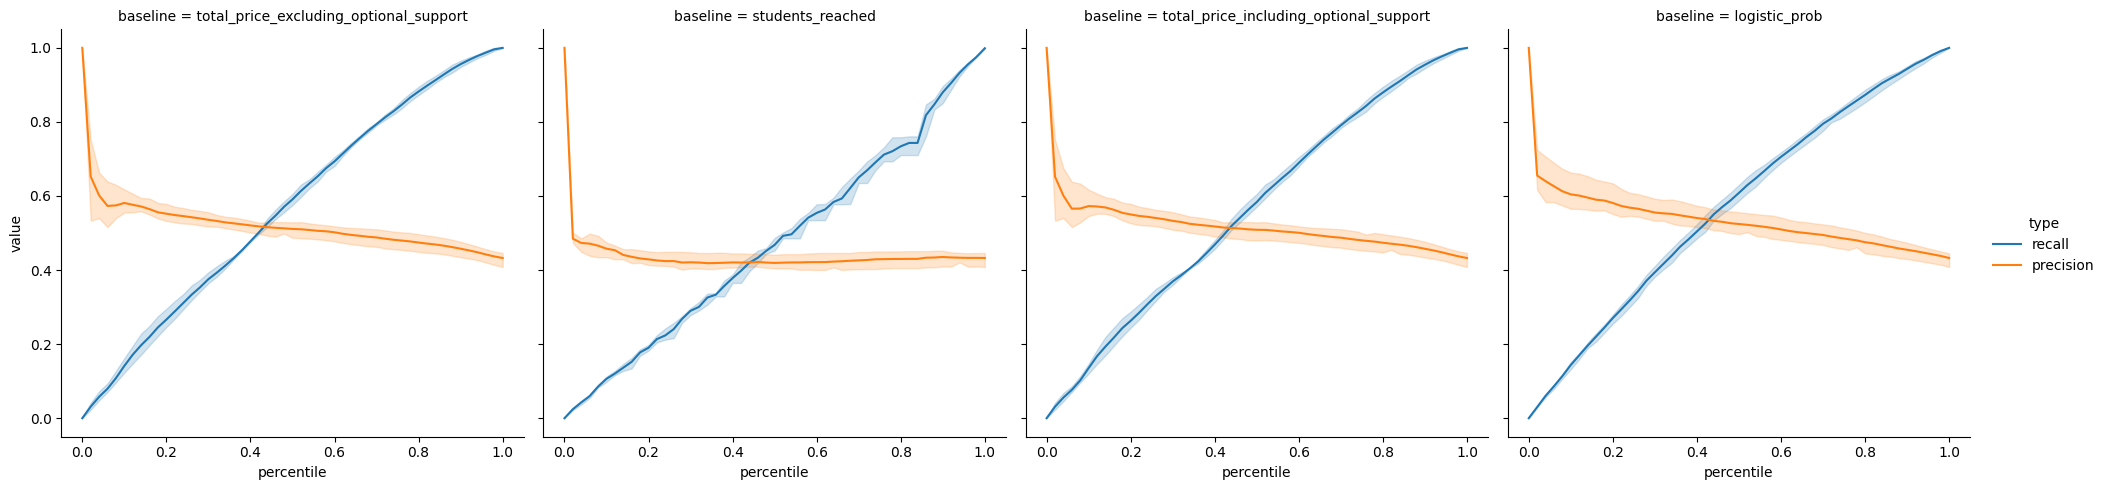

In [ ]:
records_df = pd.DataFrame.from_records(records_df)
records_df = records_df.fillna(1)

import seaborn as sns
sns.relplot(
    data=records_df, x="percentile", y="value",
    col="baseline", hue="type", 
    kind="line"
)

# 

In [ ]:
print(len(projects), len(joined))

664098 664098


In [ ]:
print(len(joined), len(projects))

664098 664098


In [ ]:
donations[donations["projectid"] == "e02da37beb332eb66c2d2ba989c597ad"]

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,...,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
384319,be0020e2485acd44cdb30f3e75006023,e02da37beb332eb66c2d2ba989c597ad,ed7fc45ea1434692daf4d48f87aa9c0a,Cambridge,MA,2139.0,f,2002-07-08 00:00:00,1241.0,0.0,...,100_and_up,f,creditcard,f,f,f,f,f,f,NaN


In [ ]:
joined = joined.fillna(0)

joined["fraction_funded"] = joined["donation_to_project"] / joined["total_price_excluding_optional_support"]
joined["fully_funded"] = 0
joined.loc[joined["fraction_funded"] >= 1, "fully_funded"] = 1
# Get Baseline Rate
print(joined["fully_funded"].value_counts() / len(joined)*100)

1    54.761797
0    45.238203
Name: fully_funded, dtype: float64


In [ ]:
cuts = pd.qcut(joined['total_price_excluding_optional_support'], 20)
plot_df = joined.groupby(cuts, observed=True)['fully_funded'].agg(['count', 'sum']).reset_index()
plot_df['fraction_fully_funded'] = plot_df['sum']/plot_df['count']
print(plot_df)

   total_price_excluding_optional_support  count    sum  fraction_fully_funded
0                       (-0.001, 152.238]  33205  25901               0.780033
1                       (152.238, 178.94]  33265  23973               0.720667
2                        (178.94, 208.54]  33148  21975               0.662936
3                        (208.54, 237.64]  33208  21092               0.635148
4                         (237.64, 267.2]  33217  20624               0.620887
5                         (267.2, 298.56]  33188  19722               0.594251
6                        (298.56, 328.09]  33208  19527               0.588021
7                         (328.09, 354.0]  33247  18750               0.563961
8                         (354.0, 383.11]  33166  17915               0.540162
9                         (383.11, 411.0]  33414  17865               0.534656
10                         (411.0, 435.0]  33134  17604               0.531297
11                        (435.0, 456.53]  33062  17

In [ ]:
joined["baseline1"] = (joined["total_price_excluding_optional_support"] < 435.0).astype(float)
print((joined["baseline1"] == joined["fully_funded"]).astype(float).mean())

0.5796042150405513


In [ ]:
plot_df = joined.groupby("resource_type", observed=True)['fully_funded'].agg(['count', 'sum']).reset_index()
plot_df['fraction_fully_funded'] = plot_df['sum']/plot_df['count']
print(plot_df)

  resource_type   count     sum  fraction_fully_funded
0             0      45      22               0.488889
1         Books  142394   86616               0.608284
2         Other   69791   37258               0.533851
3      Supplies  229213  131324               0.572934
4    Technology  216145  104688               0.484342
5         Trips    5499    3227               0.586834
6      Visitors    1011     537               0.531157


In [ ]:
joined["baseline2"] = (joined["resource_type"] == "Books").astype(float)
print((joined["baseline2"] == joined["fully_funded"]).astype(float).mean())

0.49881794554418174


# Logistic Regression (new features)

In [ ]:

joined

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,donation_to_project,fraction_funded,fully_funded,poverty_level_num,baseline1,baseline2
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,0,...,32.0,f,f,2014-05-12,0.0,0.000000,0,0.0,0.0,1.0
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,22.0,f,f,2014-05-12,0.0,0.000000,0,0.0,1.0,1.0
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,17.0,f,f,2014-05-11,0.0,0.000000,0,1.0,1.0,0.0
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,12.0,f,f,2014-05-11,0.0,0.000000,0,0.0,0.0,1.0
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,24.0,f,f,2014-05-11,0.0,0.000000,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664093,a7236ea96c812895cafc5d700d779147,c4f90a541cb81e68cd7ad180309985ae,a1e14d253e77ffccc074705527845b4a,3.600081e+11,40.809677,-73.939178,New York,NY,10037.0,urban,...,0.0,f,f,2002-09-17,254.0,1.099567,1,0.0,1.0,0.0
664094,e02da37beb332eb66c2d2ba989c597ad,d95c94eea994274d614be50bddd89973,bbd70e92262f0f0a342df5d1f3119d8e,3.600097e+11,40.701778,-74.011840,New York,NY,10004.0,urban,...,0.0,f,f,2002-09-17,1241.0,1.099203,1,0.0,0.0,0.0
664095,82e536f14eadf2671a70e03416f695a3,b00d2790934ce7487c99bc9d6e1d5d4d,0c5b1a4b6985dcd42c72b732c774474c,3.600077e+11,40.770233,-73.950760,New York,NY,10075.0,urban,...,0.0,f,f,2002-09-16,125.0,1.000000,1,2.0,1.0,0.0
664096,e139df754a873a62d93daa56acbf8040,e5476c2ef97b33614445a17554535adc,a81c26262a3ad70702a8f14e5329b023,3.600077e+11,40.765517,-73.960090,New York,NY,10065.0,0,...,0.0,f,f,2002-09-13,125.0,1.000000,1,0.0,1.0,1.0


In [ ]:
historical_teacher_success_rate = joined

In [ ]:
high_priority_df = joined[high_priority_features]

In [ ]:
historical_teacher_success_rate = historical_teacher_success_rate.groupby("teacher_acctid")["fully_funded"].mean()

In [ ]:
historical_teacher_success_rate = historical_teacher_success_rate.to_frame()

In [ ]:
historical_teacher_success_rate = historical_teacher_success_rate.reset_index()

In [ ]:
historical_teacher_success_rate = joined[(joined['date_posted'] >= training_set_start) & (joined['date_posted'] < training_set_end)]
historical_teacher_success_rate = historical_teacher_success_rate.groupby("teacher_acctid")["fully_funded"].mean()
joined_new = joined.merge(historical_teacher_success_rate.rename('historical_teacher_success_rate').reset_index(), on="teacher_acctid", how="left")
joined_new = joined_new.fillna(0)

In [ ]:
historical_school_success_rate = joined[(joined['date_posted'] >= training_set_start) & (joined['date_posted'] < training_set_end)]
historical_school_success_rate = historical_school_success_rate.groupby("schoolid")["fully_funded"].mean()
joined_new = joined_new.merge(historical_school_success_rate.rename('historical_school_success_rate').reset_index(), on="schoolid", how="left")
joined_new = joined_new.fillna(0)

In [ ]:
historical_zip_success_rate = joined[(joined['date_posted'] >= training_set_start) & (joined['date_posted'] < training_set_end)]
historical_zip_success_rate = historical_zip_success_rate.groupby("school_zip")["fully_funded"].mean()
joined_new = joined_new.merge(historical_zip_success_rate.rename('historical_zip_success_rate').reset_index(), on="school_zip", how="left")
joined_new = joined_new.fillna(0)

In [ ]:
funding_one_week = projects_donations[pd.to_datetime(projects_donations["date_posted"]) >= pd.to_datetime(projects_donations["donation_timestamp"]) - pd.Timedelta("7 days")]
funding_one_week = funding_one_week.groupby("projectid")["donation_to_project"].sum()
joined_new = joined_new.merge(funding_one_week.rename("funding_one_week").reset_index(), on="projectid", how="left")
joined_new = joined_new.fillna(0)

In [ ]:
high_priority_features = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                          "primary_focus_area", "resource_type", "poverty_level", 
                          "total_price_excluding_optional_support", "students_reached",
                          "historical_teacher_success_rate",
                          "historical_school_success_rate",
                          "historical_zip_success_rate",
                          "funding_one_week"]

In [ ]:
starting_date = pd.to_datetime("2008/01/01")

training_set_length = pd.Timedelta("360days")
validation_set_length = pd.Timedelta("120days")

model_retrain_interval = pd.Timedelta("360days")

records_df = []

high_priority_df = joined_new[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])
for i in range(3):

    training_set_start = starting_date + model_retrain_interval * i
    training_set_end = training_set_start + training_set_length
    validation_set_end = training_set_end + validation_set_length

    training_set = high_priority_df[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]

    validation_set = high_priority_df[(joined_new['date_posted'] >= training_set_end) & 
                            (joined_new['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", training_set_end,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined_new[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined_new[(joined_new['date_posted'] >= training_set_end) & 
                            (joined_new['date_posted'] < validation_set_end)]['fully_funded'] 

    training_set, validation_set = logistic_regression(training_set, training_labels, validation_set)
    for baseline in ["logistic_prob"]:

        for percentile in np.linspace(0, 1, num=51):

            split_value = training_set[baseline].quantile(q=1 - percentile)

            split_failure_rate_val = validation_labels[validation_set[baseline] > split_value].mean()

            precision_val = 1 - split_failure_rate_val

            subsampled_val = validation_set[validation_labels != 1]

            subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)

            recall_val = subsampled_val["true_positive"].mean()

            print(i, baseline, percentile, 1 - validation_labels.mean(), precision_val, recall_val)

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=recall_val, type="recall")
            )

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=precision_val, type="precision")
            )

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00


<ipython-input-20-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-20-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

0 logistic_prob 0.0 0.4430856612959314 1.0 0.00013080444735120994
0 logistic_prob 0.02 0.4430856612959314 0.8368055555555556 0.031523871811641596
0 logistic_prob 0.04 0.4430856612959314 0.808849557522124 0.059777632439502945
0 logistic_prob 0.06 0.4430856612959314 0.7808370044052864 0.09274035317200785
0 logistic_prob 0.08 0.4430856612959314 0.7653399668325042 0.12073250490516678
0 logistic_prob 0.1 0.4430856612959314 0.7607561929595827 0.152648790058862
0 logistic_prob 0.12 0.4430856612959314 0.7542794036443954 0.17867887508175279
0 logistic_prob 0.14 0.4430856612959314 0.7435897435897436 0.20483976455199476
0 logistic_prob 0.16 0.4430856612959314 0.7383022774327122 0.23322432962720732
0 logistic_prob 0.18 0.4430856612959314 0.7282331511839708 0.2614780902550687
0 logistic_prob 0.2 0.4430856612959314 0.7186981069412155 0.2830608240680183
0 logistic_prob 0.22 0.4430856612959314 0.7153614457831325 0.3106605624591236
0 logistic_prob 0.24 0.4430856612959314 0.7104035135877025 0.3385219097

<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 logistic_prob 0.36 0.4430856612959314 0.6700442151805452 0.47573577501635056
0 logistic_prob 0.38 0.4430856612959314 0.6640543364681295 0.4987573577501635
0 logistic_prob 0.4 0.4430856612959314 0.6605519748801851 0.5228253760627861
0 logistic_prob 0.42 0.4430856612959314 0.6551017189717709 0.5433616742969261
0 logistic_prob 0.44 0.4430856612959314 0.6504504504504505 0.5666448659254415
0 logistic_prob 0.46 0.4430856612959314 0.6446067898581864 0.5886200130804448
0 logistic_prob 0.48 0.4430856612959314 0.6421225832990538 0.6125572269457161
0 logistic_prob 0.5 0.4430856612959314 0.6371391076115486 0.6350555918901243
0 logistic_prob 0.52 0.4430856612959314 0.6307247106190237 0.6557226945716155
0 logistic_prob 0.54 0.4430856612959314 0.6245299041611063 0.6733812949640288
0 logistic_prob 0.56 0.4430856612959314 0.6213274025517967 0.6943100065402223
0 logistic_prob 0.58 0.4430856612959314 0.6155324440425051 0.7122302158273381
0 logistic_prob 0.6 0.4430856612959314 0.6105492115280043 0.73433

<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0 logistic_prob 0.76 0.4430856612959314 0.5675107260031969 0.8824068018312623
0 logistic_prob 0.78 0.4430856612959314 0.5604763069896419 0.8988881621975147
0 logistic_prob 0.8 0.4430856612959314 0.5534142279324292 0.912753433616743
0 logistic_prob 0.8200000000000001 0.4430856612959314 0.5468121324667286 0.9243950294310006
0 logistic_prob 0.84 0.4430856612959314 0.5384615384615384 0.9376062786134729
0 logistic_prob 0.86 0.4430856612959314 0.5304170013875703 0.9500327011118378
0 logistic_prob 0.88 0.4430856612959314 0.5231652026069709 0.9659908436886854
0 logistic_prob 0.9 0.4430856612959314 0.5168601437258153 0.9784172661870504
0 logistic_prob 0.92 0.4430856612959314 0.5073762209498147 0.9852190974493132
0 logistic_prob 0.9400000000000001 0.4430856612959314 0.4944596532394734 0.9922825376062786
0 logistic_prob 0.96 0.4430856612959314 0.4822888283378747 0.9955526487900589
0 logistic_prob 0.98 0.4430856612959314 0.467839843031455 0.9980379332897319
0 logistic_prob 1.0 0.4430856612959314 0

<ipython-input-20-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-20-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

1 logistic_prob 0.0 0.40850670365233477 nan 0.0
1 logistic_prob 0.02 0.40850670365233477 1.0 0.03010411951109099
1 logistic_prob 0.04 0.40850670365233477 0.98828125 0.05726573110004527
1 logistic_prob 0.06 0.40850670365233477 0.9805194805194806 0.08544590312358533
1 logistic_prob 0.08 0.40850670365233477 0.9702495201535508 0.1144182888184699
1 logistic_prob 0.1 0.40850670365233477 0.9604863221884499 0.14305115436849253
1 logistic_prob 0.12 0.40850670365233477 0.9522313010685104 0.17145767315527388
1 logistic_prob 0.14 0.40850670365233477 0.9420212765957446 0.20043005885015844
1 logistic_prob 0.16 0.40850670365233477 0.9298808432630614 0.22962879130828429
1 logistic_prob 0.18 0.40850670365233477 0.917135961383749 0.25803531009506564
1 logistic_prob 0.2 0.40850670365233477 0.9076421586381745 0.2836124943413309
1 logistic_prob 0.22 0.40850670365233477 0.8965744400527009 0.30805794477138976
1 logistic_prob 0.24 0.40850670365233477 0.8838805970149254 0.3351063829787234
1 logistic_prob 0.26 

<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 logistic_prob 0.34 0.40850670365233477 0.8322943897044037 0.46842462652784067
1 logistic_prob 0.36 0.40850670365233477 0.8192658841065772 0.4976233589859665
1 logistic_prob 0.38 0.40850670365233477 0.8098752416095589 0.5216161158895428
1 logistic_prob 0.4 0.40850670365233477 0.7959960291197883 0.5444771389769126
1 logistic_prob 0.42 0.40850670365233477 0.7832841385738698 0.5706201901312811
1 logistic_prob 0.44 0.40850670365233477 0.7712938402593574 0.5923494794024445
1 logistic_prob 0.46 0.40850670365233477 0.7579182363610995 0.6147578089633319
1 logistic_prob 0.48 0.40850670365233477 0.7447483154974237 0.6379583521955636
1 logistic_prob 0.5 0.40850670365233477 0.7311463046757165 0.6583295608872793
1 logistic_prob 0.52 0.40850670365233477 0.7215083463432208 0.679945676776822
1 logistic_prob 0.54 0.40850670365233477 0.7100342075256556 0.7047306473517428
1 logistic_prob 0.56 0.40850670365233477 0.6981523996938888 0.7227252150294251
1 logistic_prob 0.58 0.40850670365233477 0.68736280965

<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

1 logistic_prob 0.72 0.40850670365233477 0.5915688696726374 0.8671344499773653
1 logistic_prob 0.74 0.40850670365233477 0.576315011820331 0.8828655500226347
1 logistic_prob 0.76 0.40850670365233477 0.5624955588715981 0.8958804889090086
1 logistic_prob 0.78 0.40850670365233477 0.5485367351115356 0.9100271616115889
1 logistic_prob 0.8 0.40850670365233477 0.5343762324175102 0.9200995925758262
1 logistic_prob 0.8200000000000001 0.40850670365233477 0.5208504714294755 0.9315301041195111
1 logistic_prob 0.84 0.40850670365233477 0.508391821788221 0.9427342688999547
1 logistic_prob 0.86 0.40850670365233477 0.4976950354609929 0.9530330466274333
1 logistic_prob 0.88 0.40850670365233477 0.4875980981841095 0.9633318243549117
1 logistic_prob 0.9 0.40850670365233477 0.4754769145700857 0.9731779085559077
1 logistic_prob 0.92 0.40850670365233477 0.46219876306248664 0.9811000452693527
1 logistic_prob 0.9400000000000001 0.40850670365233477 0.44951526402640263 0.9865323675871435
1 logistic_prob 0.96 0.408

<ipython-input-20-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-20-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

2 logistic_prob 0.0 0.4461222875784687 nan 0.0
2 logistic_prob 0.02 0.4461222875784687 0.5032577534532187 0.10697468284305578
2 logistic_prob 0.04 0.4461222875784687 0.488645920941968 0.16093291230402748
2 logistic_prob 0.06 0.4461222875784687 0.4905856382288014 0.20929588388454934
2 logistic_prob 0.08 0.4461222875784687 0.4880965322317643 0.24873968201207688
2 logistic_prob 0.1 0.4461222875784687 0.4864127879642689 0.28657692094620796
2 logistic_prob 0.12 0.4461222875784687 0.48114827840026175 0.32590992188798407
2 logistic_prob 0.14 0.4461222875784687 0.4802429386799356 0.3635809650434879
2 logistic_prob 0.16 0.4461222875784687 0.4787637219027705 0.405905490000554
2 logistic_prob 0.18 0.4461222875784687 0.47621282337068105 0.44972577696526506
2 logistic_prob 0.2 0.4461222875784687 0.4695741405849153 0.5070079219987812


<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 logistic_prob 0.22 0.4461222875784687 0.4489219817534672 0.6078887596255055
2 logistic_prob 0.24 0.4461222875784687 0.4438329430132709 0.6299373995900505
2 logistic_prob 0.26 0.4461222875784687 0.44551862265531716 0.6407955237936956
2 logistic_prob 0.28 0.4461222875784687 0.4476750806604669 0.6533710043764889
2 logistic_prob 0.3 0.4461222875784687 0.4498256925441392 0.6647831145088915
2 logistic_prob 0.32 0.4461222875784687 0.45152313457756665 0.6741454767048917
2 logistic_prob 0.34 0.4461222875784687 0.4529383659818442 0.6827322586006316
2 logistic_prob 0.36 0.4461222875784687 0.4534685126639776 0.6913190404963714
2 logistic_prob 0.38 0.4461222875784687 0.4541538019674014 0.7007921998781231
2 logistic_prob 0.4 0.4461222875784687 0.4548003549245785 0.7098775691097446
2 logistic_prob 0.42 0.4461222875784687 0.45521838273987025 0.7188521411556147
2 logistic_prob 0.44 0.4461222875784687 0.4560060943938502 0.7295440695806327
2 logistic_prob 0.46 0.4461222875784687 0.4575310665027994 0.74

<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 logistic_prob 0.48 0.4461222875784687 0.45827296923958083 0.7535316602958285
2 logistic_prob 0.5 0.4461222875784687 0.45859660791486534 0.7639465957564678
2 logistic_prob 0.52 0.4461222875784687 0.4592633928571429 0.7750817129244917
2 logistic_prob 0.54 0.4461222875784687 0.45945420996406716 0.7862722286853914
2 logistic_prob 0.56 0.4461222875784687 0.4594999681102111 0.7982383247465514
2 logistic_prob 0.58 0.4461222875784687 0.45890410958904104 0.8091518475430725
2 logistic_prob 0.6 0.4461222875784687 0.45941181927822616 0.8230014957620077
2 logistic_prob 0.62 0.4461222875784687 0.45946933926341127 0.8355769763448009
2 logistic_prob 0.64 0.4461222875784687 0.45891151558839427 0.8464351005484461
2 logistic_prob 0.66 0.4461222875784687 0.45997985662657737 0.8602293501745055
2 logistic_prob 0.68 0.4461222875784687 0.4603327777290406 0.8720846490499141
2 logistic_prob 0.7000000000000001 0.4461222875784687 0.4604526297557878 0.883662954960944


<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

2 logistic_prob 0.72 0.4461222875784687 0.46052969182085124 0.8949088693147194
2 logistic_prob 0.74 0.4461222875784687 0.46052186654643823 0.9053792033682344
2 logistic_prob 0.76 0.4461222875784687 0.46009912568914635 0.9154063486787436
2 logistic_prob 0.78 0.4461222875784687 0.45944236691597007 0.9256550883607556
2 logistic_prob 0.8 0.4461222875784687 0.458685893075772 0.9339648772921167
2 logistic_prob 0.8200000000000001 0.4461222875784687 0.4579542395693136 0.9424962605949809
2 logistic_prob 0.84 0.4461222875784687 0.4572883072576561 0.9504736579690876
2 logistic_prob 0.86 0.4461222875784687 0.45610797701270633 0.95850645393607
2 logistic_prob 0.88 0.4461222875784687 0.45525779658360754 0.9655974738241648
2 logistic_prob 0.9 0.4461222875784687 0.4536519759983447 0.9716913190404963
2 logistic_prob 0.92 0.4461222875784687 0.45179627685453105 0.9774527726995734
2 logistic_prob 0.9400000000000001 0.4461222875784687 0.4503119768680566 0.9835466179159049
2 logistic_prob 0.96 0.44612228757

<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)
<ipython-input-42-daaa70a3e6ed>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


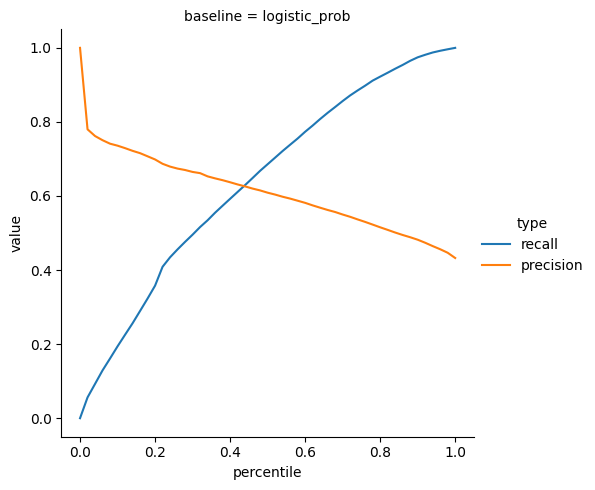

In [ ]:
records_df = pd.DataFrame.from_records(records_df)
records_df = records_df.fillna(1)

import seaborn as sns
sns.relplot(
    data=records_df, x="percentile", y="value",
    col="baseline", hue="type", 
    kind="line", ci=None
)

# FAIR HYPERBAND IMPLEMENTATION (FOR FAIRNESS MODULE)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = high_priority_df
y = joined_new['fully_funded']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest_params = {
    'n_estimators': hp.choice('n_estimators', range(50, 200)),
    'max_depth': hp.choice('max_depth', range(1, 5)),
    'min_samples_split': hp.choice('min_samples_split', range(5, 11)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

lr_params = {
    'C': hp.loguniform('C', -5, 2), 
    'penalty': hp.choice('penalty', ['l2']),  
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),  
}
decision_tree_params  = {
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
}

In [ ]:
class HyperbandClassifier:
    def __init__(self, estimator, max_iter, eta=3, scoring=None, random_state=None, custom_loss=None, param_distributions=None):
        self.estimator = estimator
        self.max_iter = max_iter
        self.eta = eta
        self.scoring = scoring
        self.random_state = random_state
        self.custom_loss = custom_loss
        self.custom_loss_scores = []
        self.param_distributions = param_distributions
        self.alpha = 0.5

    def fit(self, X, y):
        X, y = shuffle(X, y, random_state=self.random_state)

        # define the number of configurations to try
        s_max = int(np.log(self.max_iter) / np.log(self.eta))
        B = (s_max + 1) * self.max_iter
        configs = []

        for s in reversed(range(s_max + 1)):
            n = int(np.ceil(B / self.max_iter / (s + 1) * self.eta ** s))
            r = self.max_iter * self.eta ** (-s)

            for i in range(n):
                config = {'estimator': clone(self.estimator), 'r': r * self.eta ** (-i)}
                if self.param_distributions is not None:
                    config['estimator'].set_params(random_forest_params)
                configs.append(config)

        # train and evaluate configurations
        best_config = None
        best_custom_loss_score = None

        for config in configs:
            r = config['r']
            estimator = config['estimator']
            n_iter = int(np.ceil(self.max_iter / r))

            for i in range(n_iter):
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=self.random_state)

                estimator.fit(X_train, y_train)
                precision, recalls = self._custom_loss(y_val, estimator.predict(X_val))
                custom_loss_score = self.alpha * precision + (1 - self.alpha) * min(recalls)
                self.alpha = 0.5 * (np.mean(recalls) - precision) + 0.5
                self.custom_loss_scores.append(precision, min(recalls))

                if best_custom_loss_score is None or custom_loss_score < best_custom_loss_score:
                    best_custom_loss_score = custom_loss_score
                    best_config = config.copy()

        # retrain the best configuration on the full dataset
        best_estimator = best_config['estimator']
        best_estimator.fit(X, y)
        self.estimator_ = best_estimator

    def predict(self, X):
        return self.estimator_.predict(X)

    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)

    def _score(self, estimator, X, y):
        if self.custom_loss is None:
            return None

        return self.custom_loss(y, estimator.predict(X))

    def _custom_loss(self, y_true, y_pred):
        if self.custom_loss is None:
            return None

        return self.custom_loss(y_true, y_pred)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


def custom_loss(X, y_true, y_pred):
    # group the data by poverty level
    poverty_levels = ['poverty_level_highest', 'poverty_level_high', 'poverty_level_moderate', 'poverty_level_low']
    groups = {}
    for level in poverty_levels:
        group = X.index[y_true[level] == 1].tolist()
        groups[level] = group

    # compute the recall score for each group
    recalls = []
    for group in groups.values():
        true_group = y_true.loc[group]
        pred_group = y_pred[group]
        recall = recall_score(true_group, pred_group)
        recalls.append(recall)

    # min_recall = min(recalls)
    precision = precision_score(y_true, y_pred)
    return precision, recalls
    # overall_score = alpha * precision + (1.0 - alpha) * recall
    # return 1.0 - overall_score # has to be negative, 

X = high_priority_df
y = joined_new['fully_funded']

from sklearn.linear_model import LogisticRegression
kr = LogisticRegression(random_state=0)
rf = RandomForestClassifier(n_estimators=100)

# create a hyperband classifier with custom loss
hb = HyperbandClassifier(rf, max_iter=4, eta=2, scoring=None, random_state=42, custom_loss=custom_loss)

# fit the hyperband classifier on the entire dataset
hb.fit(X, y)

# print the custom loss scores for each configuration
print(hb.custom_loss_scores)


# IGNORE BELOW (trying out other things)

In [ ]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def hyperband_search(X, y, estimator, reward_func, max_iter=81, eta=3, min_resource=1):
    """
    Implements the Hyperband algorithm for hyperparameter optimization.
    
    Parameters:
        X (array-like): Training data features
        y (array-like): Training data labels
        estimator: The model estimator to optimize
        reward_func: The reward function to optimize
        max_iter (int): The maximum number of iterations for Hyperband
        eta (float): The downsampling rate for successive halving
        min_resource (int): The minimum amount of resources to allocate for a model
        
    Returns:
        tuple: The best hyperparameters and the corresponding score
    """
    logeta = lambda x: np.log(x) / np.log(eta)
    s_max = int(logeta(max_iter))
    B = (s_max + 1) * max_iter
    best_score = -np.inf
    best_params = None
    
    for s in reversed(range(s_max + 1)):
        n = int(np.ceil(B / max_iter / (s + 1) * eta ** s))
        r = max_iter * eta ** (-s)
        T = [(n, r * eta ** (-i)) for i in range(s + 1)]
        
        for i in range(s + 1):
            n_i, r_i = T[i]
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=r_i)
            models = [estimator(random_state=i) for i in range(n_i)]
            
            for j in range(max_iter):
                n_j = n_i * eta ** (-j)
                idxs = np.random.choice(n_i, int(n_j), replace=False)
                X_batch, y_batch = X_train[idxs], y_train[idxs]
                for model in models:
                    model.fit(X_batch, y_batch)
                scores = [reward_func(model.predict_proba(X_val)[:, 1], y_val) for model in models]
                if best_score < max(scores):
                    best_score = max(scores)
                    best_params = models[np.argmax(scores)].get_params()
                models = [models[k] for k in np.argsort(scores)[int(n_j/eta):]]
    
    return best_params, best_score


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Define estimator
estimator = DecisionTreeRegressor(max_depth=5, random_state=42)

# Define reward function
def poverty_tpr_disparity(y_true, y_pred, **kwargs):
    df = kwargs['sensitive_features']
    high_poverty_mask = df['poverty_level_highest poverty'] == 1
    high_poverty_tpr = sum((y_true[high_poverty_mask] == 1) & (y_pred[high_poverty_mask] == 1)) / sum(y_true[high_poverty_mask] == 1)
    
    low_poverty_mask = df['poverty_level_high poverty'] == 1
    low_poverty_mask |= df['poverty_level_moderate poverty'] == 1
    low_poverty_mask |= df['poverty_level_low poverty'] == 1
    low_poverty_tpr = sum((y_true[low_poverty_mask] == 1) & (y_pred[low_poverty_mask] == 1)) / sum(y_true[low_poverty_mask] == 1)
    
    return high_poverty_tpr / low_poverty_tpr

reward_func = make_scorer(poverty_tpr_disparity, greater_is_better=True, sensitive_features=X_train[['poverty_level_highest poverty', 'poverty_level_high poverty', 'poverty_level_moderate poverty', 'poverty_level_low poverty']])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

# Define the function to calculate precision and poverty TPR disparity
def calculate_poverty_tpr_disparity(y_true, y_pred, X):
    # Create a DataFrame with the true labels and predicted probabilities
    df = pd.DataFrame({'true': y_true, 'pred': y_pred})
    df['poverty'] = X['poverty_level_highest poverty'] * 3 + \
                     X['poverty_level_high poverty'] * 2 + \
                     X['poverty_level_low poverty'] * 1 + \
                     X['poverty_level_moderate poverty'] * 0
    
    # Calculate the true positive rate (TPR) for each poverty level
    tpr_by_poverty = df.groupby('poverty').apply(lambda x: precision_score(x['true'], x['pred']))
    
    # Calculate the TPR disparity between the highest and lowest poverty levels
    tpr_disparity = tpr_by_poverty[3] / tpr_by_poverty[0] + 0.5
    
    return tpr_disparity

# Define the reward function
def reward(params):
    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    fairness = calculate_poverty_tpr_disparity(y_test, y_pred, X_test)
    return {'loss': -(0.7 * precision + 0.3 * fairness), 'status': STATUS_OK, 'precision': precision, 'fairness': fairness}


# Define the hyperparameter search space
space = {
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
}

# Run the hyperparameter search
trials = Trials()
results = []
best = fmin(reward, space, algo=tpe.suggest, max_evals=100, trials=trials)
for trial in trials.trials:
    results.append((trial['result']['precision'], trial['result']['fairness']))


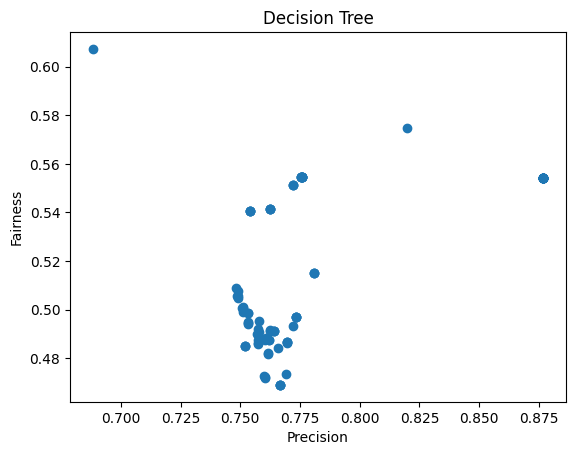

In [ ]:
# precisions, fairnesses = zip(*results)
plt.scatter(precisions, fairnesses)
plt.xlabel('Precision')
plt.ylabel('Fairness')
plt.title('Decision Tree')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

# Define the function to calculate precision and poverty TPR disparity
def calculate_poverty_tpr_disparity(y_true, y_pred, X):
    # Create a DataFrame with the true labels and predicted probabilities
    df = pd.DataFrame({'true': y_true, 'pred': y_pred})
    df['poverty'] = X['poverty_level_highest poverty'] * 3 + \
                     X['poverty_level_high poverty'] * 2 + \
                     X['poverty_level_low poverty'] * 1 + \
                     X['poverty_level_moderate poverty'] * 0
    
    # Calculate the true positive rate (TPR) for each poverty level
    tpr_by_poverty = df.groupby('poverty').apply(lambda x: precision_score(x['true'], x['pred']))
    
    # Calculate the TPR disparity between the highest and lowest poverty levels
    tpr_disparity = tpr_by_poverty[3] - tpr_by_poverty[0]
    
    return tpr_disparity

# Define the reward function
def reward(params):
    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    fairness = calculate_poverty_tpr_disparity(y_test, y_pred, X_test)
    return {'loss': -(0.7 * precision + 0.3 * fairness), 'status': STATUS_OK, 'precision': precision, 'fairness': fairness}


# Define the hyperparameter search space
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'max_depth': hp.choice('max_depth', range(1, 5)),
    'min_samples_split': hp.choice('min_samples_split', range(5, 11)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
}

# Run the hyperparameter search
trials = Trials()
results = []
best = fmin(reward, space, algo=tpe.suggest, max_evals=100, trials=trials)
for trial in trials.trials:
    results.append((trial['result']['precision'], trial['result']['fairness']))

# Plot the results
precisions, fairnesses = zip(*results)
plt.scatter(precisions, fairnesses)
plt.xlabel('Precision')
plt.ylabel('Poverty TPR Disparity')
plt.show()


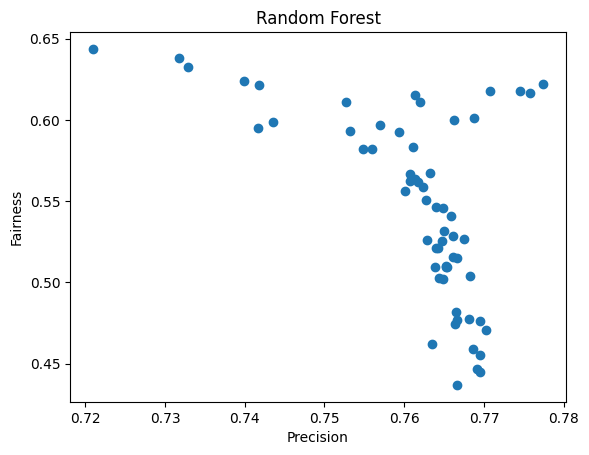

In [ ]:
plt.scatter(precisions[idx], fairnesses[idx])
plt.xlabel('Precision')
plt.ylabel('Fairness')
plt.title('Random Forest')
plt.show()

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  1%|          | 1/100 [00:00<00:51,  1.93trial/s, best loss: -0.8420272183067719]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  3%|▎         | 3/100 [00:01<00:57,  1.70trial/s, best loss: -0.8420272183067719]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  4%|▍         | 4/100 [00:02<00:53,  1.79trial/s, best loss: -0.8420272183067719]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  5%|▌         | 5/100 [00:02<00:49,  1.90trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 6/100 [00:03<01:02,  1.51trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  8%|▊         | 8/100 [00:05<01:01,  1.48trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  9%|▉         | 9/100 [00:05<01:05,  1.38trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 11%|█         | 11/100 [00:07<01:12,  1.22trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 12%|█▏        | 12/100 [00:08<01:12,  1.22trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 15%|█▌        | 15/100 [00:11<01:10,  1.21trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 19%|█▉        | 19/100 [00:12<00:40,  2.00trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 21%|██        | 21/100 [00:13<00:29,  2.67trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 22/100 [00:13<00:26,  2.89trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 23%|██▎       | 23/100 [00:13<00:25,  3.03trial/s, best loss: -0.8421327917148445]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 24/100 [00:14<00:24,  3.16trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 25%|██▌       | 25/100 [00:14<00:22,  3.27trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 26%|██▌       | 26/100 [00:14<00:21,  3.36trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 27%|██▋       | 27/100 [00:15<00:21,  3.46trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 29%|██▉       | 29/100 [00:15<00:19,  3.72trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 30/100 [00:15<00:18,  3.71trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 31%|███       | 31/100 [00:16<00:18,  3.74trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 32/100 [00:16<00:18,  3.69trial/s, best loss: -0.8421371619650442]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 34%|███▍      | 34/100 [00:16<00:17,  3.86trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 35%|███▌      | 35/100 [00:17<00:17,  3.79trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 36%|███▌      | 36/100 [00:17<00:16,  3.79trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 37%|███▋      | 37/100 [00:17<00:16,  3.72trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 38%|███▊      | 38/100 [00:17<00:16,  3.70trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 39%|███▉      | 39/100 [00:18<00:15,  3.88trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 41%|████      | 41/100 [00:18<00:14,  4.01trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▏     | 42/100 [00:18<00:14,  3.93trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 43%|████▎     | 43/100 [00:19<00:14,  4.02trial/s, best loss: -0.8421423326092597]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 44%|████▍     | 44/100 [00:19<00:14,  3.93trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▌     | 46/100 [00:19<00:13,  4.06trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 48/100 [00:20<00:12,  4.16trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 49%|████▉     | 49/100 [00:20<00:12,  4.01trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 51%|█████     | 51/100 [00:21<00:13,  3.71trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▏    | 52/100 [00:21<00:12,  3.88trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 54%|█████▍    | 54/100 [00:21<00:11,  3.97trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 56/100 [00:22<00:13,  3.33trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 57%|█████▋    | 57/100 [00:22<00:14,  2.90trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 58/100 [00:23<00:15,  2.71trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 59%|█████▉    | 59/100 [00:23<00:15,  2.56trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 62%|██████▏   | 62/100 [00:25<00:16,  2.36trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 63%|██████▎   | 63/100 [00:25<00:15,  2.39trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 64/100 [00:25<00:15,  2.38trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 66/100 [00:26<00:13,  2.52trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 67%|██████▋   | 67/100 [00:26<00:11,  2.76trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 68/100 [00:27<00:10,  2.98trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 69%|██████▉   | 69/100 [00:27<00:09,  3.15trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 70/100 [00:27<00:09,  3.28trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 71%|███████   | 71/100 [00:28<00:08,  3.39trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 72%|███████▏  | 72/100 [00:28<00:08,  3.45trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 73%|███████▎  | 73/100 [00:28<00:07,  3.52trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 74%|███████▍  | 74/100 [00:28<00:07,  3.54trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 76/100 [00:29<00:05,  4.03trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 77%|███████▋  | 77/100 [00:29<00:05,  3.94trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 79%|███████▉  | 79/100 [00:30<00:05,  3.91trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 80/100 [00:30<00:05,  3.86trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 81%|████████  | 81/100 [00:30<00:05,  3.76trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 83%|████████▎ | 83/100 [00:31<00:04,  3.93trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 85%|████████▌ | 85/100 [00:31<00:03,  4.10trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 86%|████████▌ | 86/100 [00:31<00:03,  3.99trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 87%|████████▋ | 87/100 [00:32<00:03,  3.88trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 88/100 [00:32<00:03,  3.83trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 89%|████████▉ | 89/100 [00:32<00:02,  3.77trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 93%|█████████▎| 93/100 [00:33<00:01,  3.88trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 94/100 [00:33<00:01,  3.86trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 95%|█████████▌| 95/100 [00:34<00:01,  3.78trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 96%|█████████▌| 96/100 [00:34<00:01,  3.72trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 98/100 [00:34<00:00,  3.89trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 99%|█████████▉| 99/100 [00:35<00:00,  3.96trial/s, best loss: -0.8421485367049883]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



100%|██████████| 100/100 [00:35<00:00,  2.82trial/s, best loss: -0.8421485367049883]


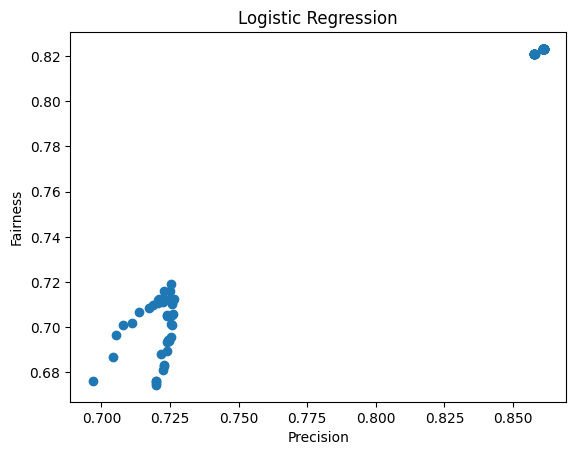

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

# Define the function to calculate precision and poverty TPR disparity
def calculate_poverty_tpr_disparity(y_true, y_pred, X):
    # Create a DataFrame with the true labels and predicted probabilities
    df = pd.DataFrame({'true': y_true, 'pred': y_pred})
    df['poverty'] = X['poverty_level_highest poverty'] * 3 + \
                     X['poverty_level_high poverty'] * 2 + \
                     X['poverty_level_low poverty'] * 1 + \
                     X['poverty_level_moderate poverty'] * 0
    
    # Calculate the true positive rate (TPR) for each poverty level
    tpr_by_poverty = df.groupby('poverty').apply(lambda x: precision_score(x['true'], x['pred']))
    
    # Calculate the TPR disparity between the highest and lowest poverty levels
    tpr_disparity = np.min(tpr_by_poverty)
    
    return tpr_disparity

# Define the reward function
def reward(params, alpha = 0.5):
    clf = LogisticRegression(**params)
    clf.fit(X_train[:1000], y_train[:1000])
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    fairness = calculate_poverty_tpr_disparity(y_test, y_pred, X_test)
    return {'loss': -(alpha * precision + (1 - alpha) * fairness), 'status': STATUS_OK, 'precision': precision, 'fairness': fairness}


# Define the hyperparameter search space
space = {
    'C': hp.loguniform('C', -5, 2), 
    'penalty': hp.choice('penalty', ['l2']),  
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),  
}

# Run the hyperparameter search
trials = Trials()
results = []
best = fmin(reward, space, algo=tpe.suggest, max_evals=100, trials=trials)
for trial in trials.trials:
    results.append((trial['result']['precision'], trial['result']['fairness']))

# Plot the results
precisions, fairnesses = zip(*results)
plt.scatter(precisions, fairnesses)
plt.xlabel('Precision')
plt.ylabel('Fairness')
plt.title('Logistic Regression')
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def random_forest(train_df, train_labels, val_df):
  # train_df_subset = train_df[high_priority_features]
  # train_df_subset = pd.get_dummies(train_df_subset, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            # "primary_focus_area", "resource_type", "poverty_level"])
  # val_df_subset = val_df[high_priority_features]
  # val_df_subset = pd.get_dummies(val_df_subset, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
  #                           "primary_focus_area", "resource_type", "poverty_level"])

  scaler = MinMaxScaler()
  scaler.fit(train_df)
  X = scaler.transform(train_df)
  X_val = scaler.transform(val_df)
  y = train_labels

  clf = RandomForestClassifier(random_state=0).fit(X, y)
  probs = clf.predict_proba(X)
  # print(probs.shape)
  train_df['logistic_prob'] = probs[:, 0]

  probs_val = clf.predict_proba(X_val)
  val_df['logistic_prob'] = probs_val[:, 0]

  return train_df, val_df

In [ ]:
starting_date = pd.to_datetime("2008/01/01")

training_set_length = pd.Timedelta("360days")
validation_set_length = pd.Timedelta("120days")

model_retrain_interval = pd.Timedelta("360days")

records_df = []

high_priority_df = joined_new[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])
for i in range(3):

    training_set_start = starting_date + model_retrain_interval * i
    training_set_end = training_set_start + training_set_length
    validation_set_end = training_set_end + validation_set_length

    training_set = high_priority_df[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]

    validation_set = high_priority_df[(joined_new['date_posted'] >= training_set_end) & 
                            (joined_new['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", training_set_end,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined_new[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined_new[(joined_new['date_posted'] >= training_set_end) & 
                            (joined_new['date_posted'] < validation_set_end)]['fully_funded'] 

    training_set, validation_set = random_forest(training_set, training_labels, validation_set)
    for baseline in ["logistic_prob"]:

        for percentile in np.linspace(0, 1, num=51):

            split_value = training_set[baseline].quantile(q=1 - percentile)

            split_failure_rate_val = validation_labels[validation_set[baseline] > split_value].mean()

            precision_val = 1 - split_failure_rate_val

            subsampled_val = validation_set[validation_labels != 1]

            subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)

            recall_val = subsampled_val["true_positive"].mean()

            print(i, baseline, percentile, 1 - validation_labels.mean(), precision_val, recall_val)

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=recall_val, type="recall")
            )

            records_df.append(
                dict(seed=i, baseline=baseline, percentile=percentile, 
                     value=precision_val, type="precision")
            )

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-260-f1193c3e43f0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

0 logistic_prob 0.0 0.4430856612959314 nan 0.0
0 logistic_prob 0.02 0.4430856612959314 nan 0.0
0 logistic_prob 0.04 0.4430856612959314 0.8571428571428572 0.009417920209287115
0 logistic_prob 0.06 0.4430856612959314 0.8342857142857143 0.01909744931327665
0 logistic_prob 0.08 0.4430856612959314 0.8235294117647058 0.031131458469587966
0 logistic_prob 0.1 0.4430856612959314 0.826302729528536 0.04355788096795291
0 logistic_prob 0.12 0.4430856612959314 0.826302729528536 0.04355788096795291
0 logistic_prob 0.14 0.4430856612959314 0.8198874296435272 0.05716154349247875
0 logistic_prob 0.16 0.4430856612959314 0.8130699088145896 0.06998037933289732
0 logistic_prob 0.18 0.4430856612959314 0.8135802469135802 0.08620013080444736
0 logistic_prob 0.2 0.4430856612959314 0.8135802469135802 0.08620013080444736
0 logistic_prob 0.22 0.4430856612959314 0.8094736842105263 0.10058862001308044
0 logistic_prob 0.24 0.4430856612959314 0.8088367899008115 0.11733158927403532
0 logistic_prob 0.26 0.443085661295931

<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-260-f1193c3e43f0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

1 logistic_prob 0.0 0.40850670365233477 nan 0.0
1 logistic_prob 0.02 0.40850670365233477 1.0 0.00599818922589407
1 logistic_prob 0.04 0.40850670365233477 0.989010989010989 0.010185604345857854
1 logistic_prob 0.06 0.40850670365233477 0.9825581395348837 0.019126301493888637
1 logistic_prob 0.08 0.40850670365233477 0.9818181818181818 0.02444545043005885
1 logistic_prob 0.1 0.40850670365233477 0.9816849816849816 0.030330466274332276
1 logistic_prob 0.12 0.40850670365233477 0.9814241486068112 0.03587596197374378
1 logistic_prob 0.14 0.40850670365233477 0.974937343358396 0.04402444545043006
1 logistic_prob 0.16 0.40850670365233477 0.9653679653679653 0.0504753282028067
1 logistic_prob 0.18 0.40850670365233477 0.9615384615384616 0.06507469443186963
1 logistic_prob 0.2 0.40850670365233477 0.9591240875912409 0.07435491172476233
1 logistic_prob 0.22 0.40850670365233477 0.9557291666666666 0.08306926210955183
1 logistic_prob 0.24 0.40850670365233477 0.9500594530321046 0.09042553191489362
1 logisti

<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-260-f1193c3e43f0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.0 0.4461222875784687 nan 0.0
2 logistic_prob 0.02 0.4461222875784687 nan 0.0
2 logistic_prob 0.04 0.4461222875784687 nan 0.0
2 logistic_prob 0.06 0.4461222875784687 nan 0.0
2 logistic_prob 0.08 0.4461222875784687 nan 0.0
2 logistic_prob 0.1 0.4461222875784687 nan 0.0
2 logistic_prob 0.12 0.4461222875784687 0.6329341317365269 0.17566893800897457
2 logistic_prob 0.14 0.4461222875784687 0.6329341317365269 0.17566893800897457
2 logistic_prob 0.16 0.4461222875784687 0.6329341317365269 0.17566893800897457
2 logistic_prob 0.18 0.4461222875784687 0.6121001204658011 0.2533377652207634
2 logistic_prob 0.2 0.4461222875784687 0.5961267986584442 0.3052462467453327
2 logistic_prob 0.22 0.4461222875784687 0.5773969430291801 0.3452994293944934
2 logistic_prob 0.24 0.4461222875784687 0.5457554803589819 0.4110021605451222
2 logistic_prob 0.26 0.4461222875784687 0.5126728794444115 0.47847764666777465
2 logistic_prob 0.28 0.4461222875784687 0.4936910189799597 0.5158716968588998
2 logisti

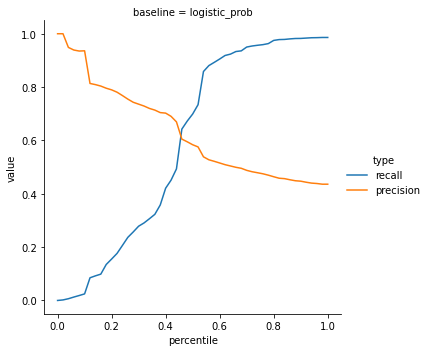

In [ ]:
records_df = pd.DataFrame.from_records(records_df)
records_df = records_df.fillna(1)

import seaborn as sns
sns.relplot(
    data=records_df, x="percentile", y="value",
    col="baseline", hue="type", 
    kind="line", ci=None
)

# Evaluation start time vs. Precision

In [ ]:
records_df = []

In [ ]:
starting_date = pd.to_datetime("2008/01/01")
last_date = pd.to_datetime("2013-10-13")
training_set_length = pd.Timedelta("360days")
training_set_start = starting_date
training_set_end = training_set_start + training_set_length
validation_set_length = pd.Timedelta("120days")

high_priority_df = joined_new[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])

current_validation_set_start = training_set_end

while current_validation_set_start <= last_date - validation_set_length:
    validation_set_end = current_validation_set_start + validation_set_length

    training_set = high_priority_df[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]

    validation_set = high_priority_df[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", current_validation_set_start,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined_new[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined_new[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]['fully_funded'] 

    training_set, validation_set = logistic_regression(training_set, training_labels, validation_set)
    
    percentile = 0.1
    split_value = training_set[baseline].quantile(q=1 - percentile)

    split_failure_rate_val = validation_labels[validation_set[baseline] > split_value].mean()

    precision_val = 1 - split_failure_rate_val

    subsampled_val = validation_set[validation_labels != 1]

    subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)

    recall_val = subsampled_val["true_positive"].mean()

    print(i, baseline, percentile, 1 - validation_labels.mean(), precision_val, recall_val)

    records_df.append(
        dict(eval_start=current_validation_set_start, baseline=baseline, percentile=percentile, 
              value=precision_val, type="precision", model_type="logistic_regression")
    )

    current_validation_set_start =  current_validation_set_start + pd.Timedelta("100 days")

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.4430856612959314 0.7614080834419817 0.1527795945062132
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-04-05 00:00:00 validation_set_end: 2009-08-03 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-12-01 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.4876584839492851 0.8268398268398268 0.15848430369243535
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-07-14 00:00:00 validation_set_end: 2009-11-11 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-03-11 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.46043685809344714 0.7817097415506958 0.15441407477222746
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-10-22 00:00:00 validation_set_end: 2010-02-19 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-06-19 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.35345079334176965 0.8258465791292329 0.16455521894794822
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-01-30 00:00:00 validation_set_end: 2010-05-30 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-09-27 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.4724000192502046 0.9649776453055141 0.1319274653626732
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-05-10 00:00:00 validation_set_end: 2010-09-07 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-01-05 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.3956092014344441 0.9408450704225352 0.1476895865575945
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-08-18 00:00:00 validation_set_end: 2010-12-16 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-04-15 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.34892829167556794 0.9590062111801242 0.15755102040816327
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-11-26 00:00:00 validation_set_end: 2011-03-26 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-07-24 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.42925481568647517 0.7433389544688027 0.13134684147794995
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-03-06 00:00:00 validation_set_end: 2011-07-04 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-11-01 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.5359967775010985 0.8421052631578947 0.12352257976361276
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-06-14 00:00:00 validation_set_end: 2011-10-12 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-02-09 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.4663704302161179 0.67144678138942 0.1303594629709831
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-09-22 00:00:00 validation_set_end: 2012-01-20 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-05-19 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.3164301699333546 0.5660011092623405 0.158622833605347
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-12-31 00:00:00 validation_set_end: 2012-04-29 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-08-27 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.40632986981965846 0.656702025072324 0.16013167950149904
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2012-04-09 00:00:00 validation_set_end: 2012-08-07 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-12-05 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.40391351048428525 0.6047801963294921 0.16383396924499943
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2012-07-18 00:00:00 validation_set_end: 2012-11-15 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2013-03-15 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.3460026483489199 0.5878512069647803 0.1776595108533158
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2012-10-26 00:00:00 validation_set_end: 2013-02-23 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2013-06-23 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.3584101414376263 0.6829268292682926 0.222719901150668
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2013-02-03 00:00:00 validation_set_end: 2013-06-03 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2013-10-01 00:00:00


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2 logistic_prob 0.1 0.3502587434445872 0.6743944636678201 0.19325731284085276
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2013-05-14 00:00:00 validation_set_end: 2013-09-11 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2014-01-09 00:00:00
2 logistic_prob 0.1 0.33784670734375377 0.5660944206008584 0.18981148366671463


<ipython-input-19-d7476cd5dc85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-19-d7476cd5dc85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-289-038fc3a18a16>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
starting_date = pd.to_datetime("2008/01/01")
last_date = pd.to_datetime("2013-10-13")
training_set_length = pd.Timedelta("360days")
training_set_start = starting_date
training_set_end = training_set_start + training_set_length
validation_set_length = pd.Timedelta("120days")

high_priority_df = joined_new[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])

current_validation_set_start = training_set_end

while current_validation_set_start <= last_date - validation_set_length:
    validation_set_end = current_validation_set_start + validation_set_length

    training_set = high_priority_df[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]

    validation_set = high_priority_df[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", current_validation_set_start,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined_new[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined_new[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]['fully_funded'] 

    training_set, validation_set = random_forest(training_set, training_labels, validation_set)
    
    percentile = 0.1
    split_value = training_set[baseline].quantile(q=1 - percentile)

    split_failure_rate_val = validation_labels[validation_set[baseline] > split_value].mean()

    precision_val = 1 - split_failure_rate_val

    subsampled_val = validation_set[validation_labels != 1]

    subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)

    recall_val = subsampled_val["true_positive"].mean()

    print(i, baseline, percentile, 1 - validation_labels.mean(), precision_val, recall_val)

    records_df.append(
        dict(eval_start=current_validation_set_start, baseline=baseline, percentile=percentile, 
              value=precision_val, type="precision", model_type="random_forest")
    )

    current_validation_set_start =  current_validation_set_start + pd.Timedelta("100 days")

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.4430856612959314 0.826302729528536 0.04355788096795291
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-04-05 00:00:00 validation_set_end: 2009-08-03 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-12-01 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.4876584839492851 0.8571428571428572 0.041488037615820775
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-07-14 00:00:00 validation_set_end: 2009-11-11 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-03-11 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.46043685809344714 0.8733974358974359 0.04280552937480364
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-10-22 00:00:00 validation_set_end: 2010-02-19 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-06-19 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.35345079334176965 0.9064748201438849 0.03470118424676398
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-01-30 00:00:00 validation_set_end: 2010-05-30 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-09-27 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.4724000192502046 1.0 0.02597799511002445
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-05-10 00:00:00 validation_set_end: 2010-09-07 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-01-05 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.3956092014344441 0.9967948717948718 0.03437983639177537
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-08-18 00:00:00 validation_set_end: 2010-12-16 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-04-15 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.34892829167556794 0.9928571428571429 0.02836734693877551
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2010-11-26 00:00:00 validation_set_end: 2011-03-26 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-07-24 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.42925481568647517 0.6983154670750382 0.027175208581644815
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-03-06 00:00:00 validation_set_end: 2011-07-04 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2011-11-01 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.5359967775010985 0.9025270758122743 0.03416000546560088
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-06-14 00:00:00 validation_set_end: 2011-10-12 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-02-09 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.4663704302161179 0.7797468354430379 0.038111736682546554
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-09-22 00:00:00 validation_set_end: 2012-01-20 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-05-19 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.3164301699333546 0.6414852752880922 0.03893681510841688
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2011-12-31 00:00:00 validation_set_end: 2012-04-29 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-08-27 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.40632986981965846 0.7034938621340887 0.04379519134677561
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2012-04-09 00:00:00 validation_set_end: 2012-08-07 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2012-12-05 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.40391351048428525 0.6481203007518797 0.04983235056075847
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2012-07-18 00:00:00 validation_set_end: 2012-11-15 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2013-03-15 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.3460026483489199 0.6715017064846416 0.047060934042934884
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2012-10-26 00:00:00 validation_set_end: 2013-02-23 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2013-06-23 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.3584101414376263 0.7263681592039801 0.05637500965325508
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2013-02-03 00:00:00 validation_set_end: 2013-06-03 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2013-10-01 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]
<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2 logistic_prob 0.1 0.3502587434445872 0.7180156657963446 0.05453644025780863
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2013-05-14 00:00:00 validation_set_end: 2013-09-11 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2014-01-09 00:00:00


<ipython-input-259-e60463398502>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['logistic_prob'] = probs[:, 0]


2 logistic_prob 0.1 0.33784670734375377 0.6666666666666667 0.060728162325514465


<ipython-input-259-e60463398502>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['logistic_prob'] = probs_val[:, 0]
<ipython-input-290-23b3d6fcc7ff>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_val["true_positive"] = (subsampled_val[baseline] > split_value).astype(float)


In [ ]:
starting_date = pd.to_datetime("2008/01/01")
last_date = pd.to_datetime("2013-10-13")
training_set_length = pd.Timedelta("360days")
training_set_start = starting_date
training_set_end = training_set_start + training_set_length
validation_set_length = pd.Timedelta("120days")

high_priority_df = joined_new[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])

current_validation_set_start = training_set_end

while current_validation_set_start <= last_date - validation_set_length:
    validation_set_end = current_validation_set_start + validation_set_length

    training_set = high_priority_df[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]

    validation_set = high_priority_df[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", current_validation_set_start,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined_new[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined_new[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]['fully_funded'] 

    base_rate = 1 - validation_labels.mean()

    records_df.append(
        dict(eval_start=current_validation_set_start, baseline=baseline, percentile=percentile, 
              value=base_rate, type="precision", model_type="base_rate")
    )

    current_validation_set_start =  current_validation_set_start + pd.Timedelta("100 days")

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-04-05 00:00:00 validation_set_end: 2009-08-03 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-12-01 00:00:00
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-07-14 00:00:00 validation_set_end: 2009-11-11 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2010-03-11 00:00:00
training_set_sta

In [ ]:
def get_baseline_rate(df, feature, q=0.9):
  baseline = df[feature].quantile(q=q)
  print(f"Baseline Value: {baseline}")
  check_df = df[df[feature] > baseline]
  print(f"Percentile: {len(check_df)/len(df)*100:.2f}")
  return check_df["fully_funded"].value_counts() / len(check_df)

In [ ]:
for i in range(len(records_df)):
  if records_df[i]["model_type"] == "commonsense":
    records_df[i]["model_type"] = "notused"

In [ ]:
starting_date = pd.to_datetime("2008/01/01")
last_date = pd.to_datetime("2013-10-13")
training_set_length = pd.Timedelta("360days")
training_set_start = starting_date
training_set_end = training_set_start + training_set_length
validation_set_length = pd.Timedelta("120days")

high_priority_df = joined_new[high_priority_features]
high_priority_df = pd.get_dummies(high_priority_df, columns = ["teacher_teach_for_america", "teacher_ny_teaching_fellow", "primary_focus_subject", 
                            "primary_focus_area", "resource_type", "poverty_level"])

current_validation_set_start = training_set_end

while current_validation_set_start <= last_date - validation_set_length:
    validation_set_end = current_validation_set_start + validation_set_length

    training_set = high_priority_df[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]

    validation_set = joined_new[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]

    print("training_set_start:", training_set_start,  
          "training_set_end:", training_set_end, 
          "start_date_for_labels:", training_set_start + pd.Timedelta("120days"), 
          "end_date_for_labels:", training_set_end + pd.Timedelta("120days"))

    print("validation_set_start:", current_validation_set_start,  
          "validation_set_end:", validation_set_end, 
          "start_date_for_labels:", training_set_end + pd.Timedelta("120days"), 
          "end_date_for_labels:", validation_set_end + pd.Timedelta("120days"))
    
    training_labels = joined_new[(joined_new['date_posted'] >= training_set_start) & 
                          (joined_new['date_posted'] < training_set_end)]['fully_funded']
    validation_labels = joined_new[(joined_new['date_posted'] >= current_validation_set_start) & 
                            (joined_new['date_posted'] < validation_set_end)]['fully_funded'] 

    commonsense_rate = get_baseline_rate(validation_set, "total_price_excluding_optional_support")[0]

    records_df.append(
        dict(eval_start=current_validation_set_start, baseline=baseline, percentile=percentile, 
              value=commonsense_rate, type="precision", model_type="commonsense")
    )

    current_validation_set_start =  current_validation_set_start + pd.Timedelta("100 days")

training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2008-12-26 00:00:00 validation_set_end: 2009-04-25 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-08-23 00:00:00
Baseline Value: 815.99
Percentile: 10.00
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-04-05 00:00:00 validation_set_end: 2009-08-03 00:00:00 start_date_for_labels: 2009-04-25 00:00:00 end_date_for_labels: 2009-12-01 00:00:00
Baseline Value: 809.0
Percentile: 9.99
training_set_start: 2008-01-01 00:00:00 training_set_end: 2008-12-26 00:00:00 start_date_for_labels: 2008-04-30 00:00:00 end_date_for_labels: 2009-04-25 00:00:00
validation_set_start: 2009-07-14 00:00:00 validation_set_end: 2009-11-11 00:00:00 start_date_for_label

In [ ]:
sns.set_theme()

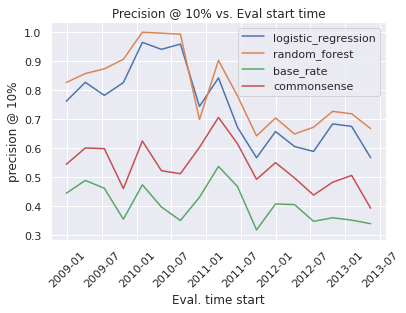

In [ ]:
for model_type in ["logistic_regression", "random_forest", "base_rate", "commonsense"]:
  y = [t['value'] for t in records_df if t["model_type"] == model_type]
  x = [t['eval_start'] for t in records_df if t["model_type"] == model_type]
  plt.plot(x, y, label=model_type)

plt.ylabel("precision @ 10%")
plt.xlabel("Eval. time start")
plt.legend()
plt.title("Precision @ 10% vs. Eval start time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
records_df

[{'eval_start': Timestamp('2008-12-26 00:00:00'),
  'baseline': 'logistic_prob',
  'percentile': 0.1,
  'value': None,
  'type': 'precision',
  'model_type': 'commonsense'},
 {'eval_start': Timestamp('2009-04-05 00:00:00'),
  'baseline': 'logistic_prob',
  'percentile': 0.1,
  'value': None,
  'type': 'precision',
  'model_type': 'commonsense'},
 {'eval_start': Timestamp('2009-07-14 00:00:00'),
  'baseline': 'logistic_prob',
  'percentile': 0.1,
  'value': None,
  'type': 'precision',
  'model_type': 'commonsense'},
 {'eval_start': Timestamp('2009-10-22 00:00:00'),
  'baseline': 'logistic_prob',
  'percentile': 0.1,
  'value': None,
  'type': 'precision',
  'model_type': 'commonsense'},
 {'eval_start': Timestamp('2010-01-30 00:00:00'),
  'baseline': 'logistic_prob',
  'percentile': 0.1,
  'value': None,
  'type': 'precision',
  'model_type': 'commonsense'},
 {'eval_start': Timestamp('2010-05-10 00:00:00'),
  'baseline': 'logistic_prob',
  'percentile': 0.1,
  'value': None,
  'type': '

In [ ]:
import matplotlib.pyplot as plt